# Project: Exploring characteristics for Medical Appointment Patients

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The **_Medical Appointment No Show_** dataset contains data for medical appointments in Brazil. The dataset contains data for over _100,000_ appointments, with _14_ variables used to describe the characteristics of the appointments. 

The variables are as follows:
1. **PatientId** - a unique ID for the patient
2. **AppointmentID** - a unique ID for every appointment made
3. **Gender** - the sex/gender of the patient
4. **Scheduledday** - The date on which the appointment was made
5. **Appointmentday** - The actual date of the appointment
6. **Age** - The age of the patient
7. **Neighbourhood** - The neighbourhood where the patient is living
8. **Scholarship** - Whether the patient is on the government funded Social Welfare program
9. **Hipertension** - Whether the patient is suffering from hipertension
10. **Diabetes** - Whether the patient is suffering from diabetes
11. **Alcoholism** - Whether the patient is suffering from Alcoholism
12. **Handcap** - Whether the patient is suffering from any sort of handicap
13. **SMS_received** - Whether the patient received a message/SMS with regards to their appointment
14. **No-show** - Whether the patient showed up to their appointment or not



There are two variables in this dataset which are of paticular interest for us:
1. _**No-show**_
2. _**Scholarship**_

The _**No-show**_ variable is important because it can provide us information about the patients who, after making an appointment with the medical practitioner, do not show up for their consultations. We are going to be exploring the dataset to try to indentify the characteristics of patients who end up being 'No-Show' at the clinics which we can use to help predict whether any future patient will show up for their appointment or not.

The _**Scholarship**_ variable is interesting because it can be used to get more information on people who are on the Givernment funded Social Welfare program. We will be using this variable to explore the dataset and identify the characteristics for the patients on the Social Welfare program.

The analysis will be built around the following _two_ questions:
1. **What factors contribute to a patient not showing up for their consultation after booking an appointment?**

2. **What are the characteristics of people who are on Government Social Welfare Program (Scholarship)**

In [1]:
#importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#background of the plots
sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format = 'retina' #for higher resolution graphs and charts

<a id='wrangling'></a>
## Data Wrangling


### Part 1: General Properties

In [2]:
#reading the data csv file into a dataframe as "df"

df = pd.read_csv('no_show_data_2.csv')

The data csv file is loaded into a pandas DataFrame.

In [3]:
#checking to see if the data was loaded correctly 
# check the column names of the data file

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape

(110527, 14)

The data was loaded successfully.

**observations**:
- There are 14 columns in the dataset and 110,527 records of patients.
- The column names are not all in smallcaps. This can make referring to them in code more prone to error.

We will need to rename the columns to make them all in lowercase and add undescores " _ " to make referring to them less error prone.

In [5]:
#checking the datatypes of the columns and the number of NULL values/records 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**observations:**
- It is noted that there are _no_ NULL values in any column i.e. all the columns contain 110,527 values and there is no missing data.
- Some columns have a datatye of "object". We need to inspect this further to identify what is the exact data type of these columns.

In [6]:
#check the exact data type for every column

for col in df.columns:
    c_type = type(df[col][0])
    print('{} - {}'.format(col, c_type))

PatientId - <class 'numpy.float64'>
AppointmentID - <class 'numpy.int64'>
Gender - <class 'str'>
ScheduledDay - <class 'str'>
AppointmentDay - <class 'str'>
Age - <class 'numpy.int64'>
Neighbourhood - <class 'str'>
Scholarship - <class 'numpy.int64'>
Hipertension - <class 'numpy.int64'>
Diabetes - <class 'numpy.int64'>
Alcoholism - <class 'numpy.int64'>
Handcap - <class 'numpy.int64'>
SMS_received - <class 'numpy.int64'>
No-show - <class 'str'>


**observation:**
- The ScheduledDay and AppointmentDay columns have type "string". 
- These need to be changed to datetime to help with computations

Next, we will check to see if there are any records which are duplicated in the dataset

In [7]:
#check if there are any duplicated records

df.duplicated().sum()

0

**observation:**
- There are no records which are duplicated in the dataset.

Exploring the data using summary statistics helps get an overview.
Summary statistics will provide us an overview of numeric columns of the dataset

In [8]:
#summary statistics

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**observations:**
- The minimum age of a patient is -1 years. This seems to be an error which needs to be corrected. The value of age should be >= 0.
- The maximum value for handcap is 4. This seems to be an error as this column is only a True/False column, meaning the only values allowed in this column should be 1/0. This error needs to be corrected

**Observations Summary:**

1. The data has **14** columns (characteristic variables) and **110,527** records of the patients
2. There is no missing data and no records are duplicated
3. The column names are not in the desired format which needs to be changed
4. Date columns of **ScheduledDay** and **AppointmentDay** are in type string. These need to be changed to type Datetime
5. There seems to be an error value of **-1** in the Age column. The values in age column need to be >= 0. This error requires correction
6. The maximum value for handcap (handicap) is **4**. The values allowed in handcap column are 1 & 0 only. This error requires correction

### Part 2: Data Cleaning

The following steps are required to get the dataset into a cleaned format:

1. Rename columns to a desirable format
2. Changing data type for **ScheduledDay** and **AppointmentDay** columns to DateTime
3. Correct the error in **Age** column - Age column has a value of **-1**
4. Correct the error in **handcap** column - Handcap has values other than 0 & 1

**1.** Renaming columns

In [9]:
#rename columns to make them all lower case and proper

df.rename(columns = lambda x: x.strip().lower(), inplace = True)

df.rename(columns = {'no-show':'no_show'}, inplace = True)

In [10]:
#check to see if the column names have been changed successfully
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


All the column names were changed successfully

**2.** Changing DataType for _ScheduledDay_ and _AppointmentDay_ columns

In [11]:
#correcting the datatypes of ScheduledDay and AppointmentDay to datetime

df['appointmentday'] = pd.to_datetime(df['appointmentday'])

df['scheduledday'] = pd.to_datetime(df['scheduledday'])

In [12]:
#check to see if the datatypes have been changed successfully

df.dtypes

patientid                     float64
appointmentid                   int64
gender                         object
scheduledday      datetime64[ns, UTC]
appointmentday    datetime64[ns, UTC]
age                             int64
neighbourhood                  object
scholarship                     int64
hipertension                    int64
diabetes                        int64
alcoholism                      int64
handcap                         int64
sms_received                    int64
no_show                        object
dtype: object

The data types of ScheduledDay and AppointmentDay have been changed successfully to datetime. 

**3.** Correcting the error in _Age_ column

In [13]:
#viewing record(s) having age value of -1

df.query('age < 0')

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


There is only one record having age of -1 years. 

As there is only one record with this error, _we will be deleting it from the dataset_ to stop it from skewing the analysis.

In [14]:
#deleting record index 99832 having age value of -1

df.drop(index = 99832, inplace = True)

In [15]:
#check if the record was dropped correctly
df.query('age < 0')

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show


**4.** Correcting error in _handcap_ column

The 'handcap' column which had a maximum value of 4. According to the definition of this column, the only values allowed in this column are 1 and 0 (i.e. True, False)

In [16]:
#check the values of records in the handcap (handicap) column

df['handcap'].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: handcap, dtype: int64

It can be seen that there are a handful of records having values other than the allowed 0 & 1 in the handcap column.
We will write a function to correct this and call it on the handcap column.

In [17]:
#defining the function which will clean the data in the handcap column

def clean_data (data):
    if data <= 0:
        data = 0
    else: 
        data = 1
    return data

#calling the function on the handcap column

df['handcap'] = df['handcap'].apply(clean_data)

In [18]:
#check to see whether the column values were cleaned

df['handcap'].value_counts()

0    108285
1      2241
Name: handcap, dtype: int64

All the values greater than 1 were converted to 1 in the handcap column

**5.** Deleting columns which are not required for analysis

The _**appointmentid**_ column which has a unique value for each appointment made will not be required for analysis. This column will, therefore, be dropped from the dataset

In [19]:
#drop 'appointmentid' column from the dataset

df.drop(['appointmentid'], axis = 1, inplace = True);

In [20]:
#check to see if the column was dropped successfully

df.head(1)

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


__The data seems to be in a cleaned state and ready for analysis__

In [21]:
#saving the clean csv file

df.to_csv('no_show_data_clean.csv', index = False)

<a id='eda'></a>
## Exploratory Data Analysis

### Getting an overview of the Dataset

In [21]:
df.describe()

,patientid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,37.089219,0.098266,0.197248,0.071865,0.030400,0.020276,0.321029
std,2.560943e+14,23.110026,0.297676,0.397923,0.258266,0.171686,0.140943,0.466874
min,3.921784e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


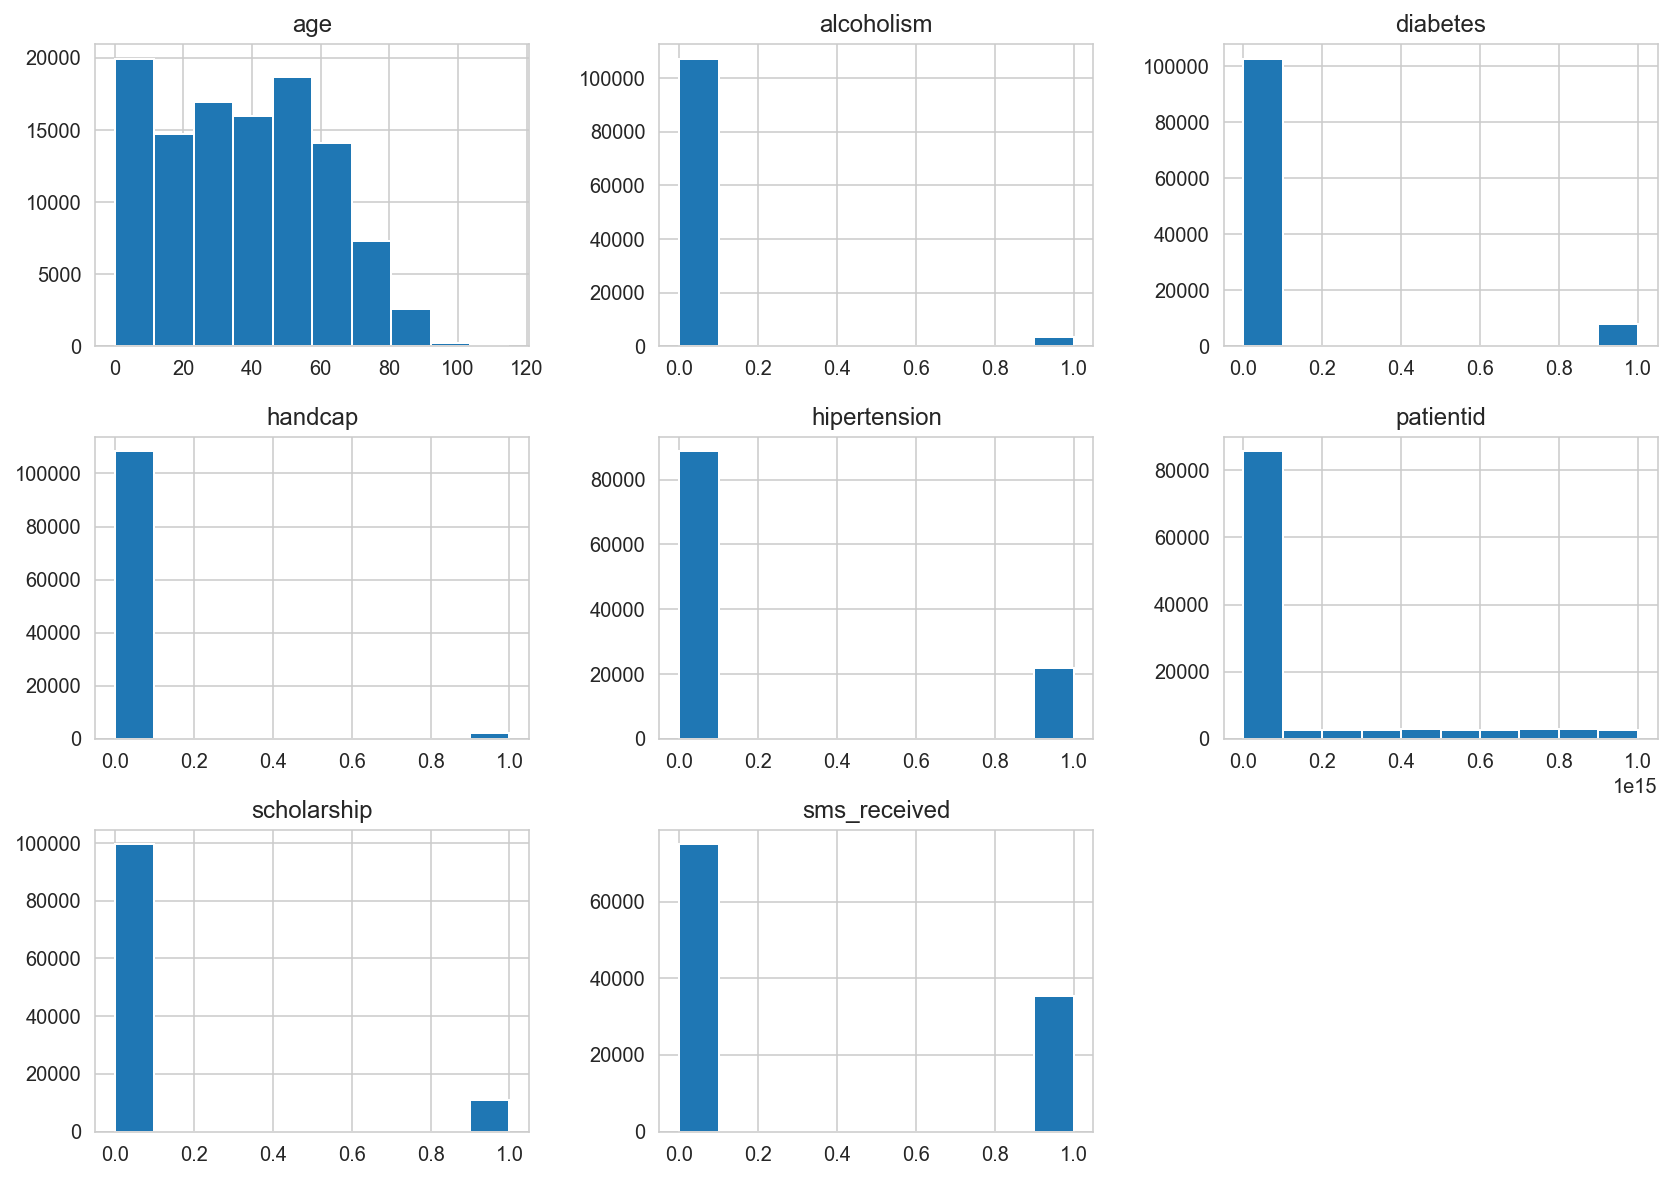

In [22]:
df.hist(figsize = (14,10));

**Description of the overall dataset:**
- The age of the patients in the dataset is skewed to the right. The youngest patient is _0 years old_ and the oldest is _115 years old_. The average age of the patients is almost *37.1* years.
- Almost *9.8%* of the patients in the dataset are on the Government Social Welfare program i.e. Scholarship.
- There are 4 diseases which are recorded in the dataset; *hipertension, diabetes, alcoholism, and handicap*. 
- of these 4 diseases, *hipertension seems to be the most common disease* among the patients with almost *19.7%* of the patients reporting to have hipertension. *Diabetes* is the second most common disease with *7.2%* patients suffering from it, followed by *alcoholism* at *3%*. Only *2%* of the patients report to be suffering from a *handicap*.
- The health practitioner runs are messaging service communicate with their patients. *32%* of the patients report to have received some sort of *communication from the clinic via sms*

### Question 1: What factors contribute to a patient not showing up for their consultation after booking an appointment?

We are going to start the analysis by looking at factors which may contribute to a patient being a "No-Show" to their appointments.

_**Method of Analysis**_

For the analysis, we will pick individual variables and check whether they affect the No_Show likelihood

We are going to asnwer the following questions and try to identify the variables responsible for patients being No_Show:

    A. Are no show appointments associated with a certain gender
    B. Are Repeat Patients less likely to be No_Show 
    C. Does being on Scholarship affect the likelihood of being No_Show
    D. Do SMS reminders decrease the number of absences?
    E. Which Neighbourhoods have the highest No_Show proportions associated to them?
    F. How is age affecting patient's absence?
    G. Is the period between scheduled day and appointment day affecting the number of no-show appointments?
    H. Are there any particular months in which No_Show appointments are more than others?
    I. Which months were the appointments scheduled in which led to the highest proportion of No_Shows?
    J. Do patients with less diseases not show up to their appointments?
    

- Are no show appointments associated with a certain gender
- Who in terms of Age misses the most appointments/How is age affecting patient's absence
- Are chronic illnesses e.g. hipertension and diabetes affecting patient's absence
- Is alcoholism a prominent factor in patient's absences? Are the absences frequent?
- Do SMS reminders decrease the number of absences?
- How does each month compare to the others in terms of No-Show Appointment?
- Does the scheduled day affect the number of no-show appointments if it is a workday or a weekend?
- Is the period between scheduled day and appointment day affecting the number of no-show appointments?

Before diving into the effects of individual variables on the patient no-show, we will calculate what is the **_average No Show percentage_** in the dataset. This will provide us with a benchmark to compare individual variables with.

Currently, the no_show column has type string. Adding a column of type int to show the values of no_show column will enable us to calculate summary statistics of this column

In [23]:
#defining a function to convert True/Yes & False/No values into 1 & 0

def boolean_convert(data):
    if data == False or data == 'No':
        data = 0
    else:
        data = 1
    return data


In [24]:
#adding a column for no_show_val with int values for no_show

df['no_show_val'] = df['no_show'].apply(boolean_convert)


#check to see if the new column was added successfully

df.head()

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,no_show_val
0,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


The no_show_val column was added to the DataFrame successfully. We can also see that the values in the no_show_val column are coded correctly. No = 0 and Yes = 1

_Note: A no_show_val of 1 means that the patient did not show up for the appointment_

As the new column _no_show_val_ contains the same information as _no_show_, we can delete the _no_show_ column from the dataframe

In [25]:
#deleting no_show column

df.drop(['no_show'], axis = 1, inplace = True);

#check to ensure the column was deleted successfully

df.head(1)

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show_val
0,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0


In [26]:
#calculating average no_show in the whole dataset

overall_noshow = df.mean()['no_show_val']
overall_noshow

0.20193438647919945

On average **20.2%** of patients in the dataset were recorded as No_Show. This average provides us a benchmark to compare other variables to and determine which variables are contributing to patients being no_show

_Defining functions to be used in the analysis_

In [27]:
#creating a list to store the names and no_show percentages for all the variables

noshow_variable = [] #list containing variable names
noshow_proportion = [] #list containing no show percentages

#defining function to add variables and their respective values to lists

def add_value (variable_name, val):
    noshow_variable.append(variable_name)
    noshow_proportion.append(round(val*100,2))
    return noshow_variable, noshow_proportion

In [28]:
#def function to add labels to the barchart
#reference taken from https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/

def bar_labels(x,y): 
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
                 #, Bbox = dict(facecolor = 'lightblue', alpha =.5)) #this part of the code can be used to place the labels in a box

In [29]:
# defining function for plotting bar chart for comparison of No_Show percentage w.r.t each variable

def plot_barchart():
    x = noshow_variable #global variable (list)
    y = noshow_proportion #global variable (list)
    plt.figure(figsize = (16,6)) #setting the figure size

    #adding a line for the overall no show average
    plt.plot(x,np.repeat(overall_noshow*100,len(x)), color = 'indianred', label = 'overall avg no_show = 20.2%')
    plt.legend()

    plt.bar(x,y, width = 0.6, color = 'lightsteelblue') 
    bar_labels(x,y)
    plt.title('Proportion of No_Show Patients')
    plt.xlabel('Variable Name')
    plt.ylabel('Proportion - %');

**A. Are No_Show appointments associated with a certain gender**

The dataset contains information for both Males (M) and Females (F). We will investigate if being Male or Female makes the patients more likely to be a No_Show patient

In [30]:
#check the number of Males and Females in the dataset

print(df.groupby('gender').count()['age'])

#check the proportion of Males and Females in the dataset

print(df.groupby('gender').count()['age']/df.count()['age'])

gender
F    71839
M    38687
Name: age, dtype: int64
gender
F    0.649974
M    0.350026
Name: age, dtype: float64


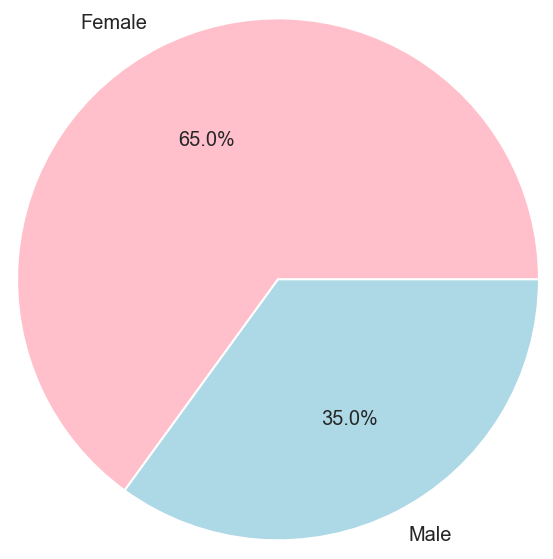

In [31]:
#plotting pie chart for M and F proportion in the dataset

gender_proportion = df.groupby('gender').count()['age']/df.count()['age']

size = gender_proportion.values
labels = 'Female', 'Male'
colors = 'pink', 'lightblue'

plt.pie(size, labels = labels, colors = colors, radius = 1.5, autopct='%1.1f%%');


71,839 or **65%** of the patients in the dataset are *Female*. 38,687 or **35%** of the patients are *Male*.

In [32]:
#calculating the percentage of No_Show patients in the Male and Female

df.groupby('gender').mean()['no_show_val']

gender
F    0.203149
M    0.199679
Name: no_show_val, dtype: float64

It can be noted that **20.3%** of Female patients were No_Show. This is slightly higher than the Male patient sample where almost **20%** of patients were No_Show. 

Eventhough the difference between genders is miniscule, _**Females seem more likely to be No_Show to their appointments as compared to Male**_

In [33]:
#defining variable for female no_show %

female_noshow = df.groupby('gender').mean()['no_show_val']['F']

In [34]:
#adding female no show value to the list

add_value('Gender - Female', female_noshow)

(['Gender - Female'], [20.31])

**B. Are Repeat Patients less likely to be No_Show**

While the dataset has a total of 110,526 records, let us check whether all the records correspond to unique patients. We can do this by checking how many unique values are present in the _PatientID_ column

In [35]:
#checking for number of unique patients in the dataset

print('no. of unique patient ids - {}'.format(df['patientid'].nunique()))
print('no. of repeat patient ids - {}'.format(df['patientid'].duplicated().sum()))

no. of unique patient ids - 62298
no. of repeat patient ids - 48228


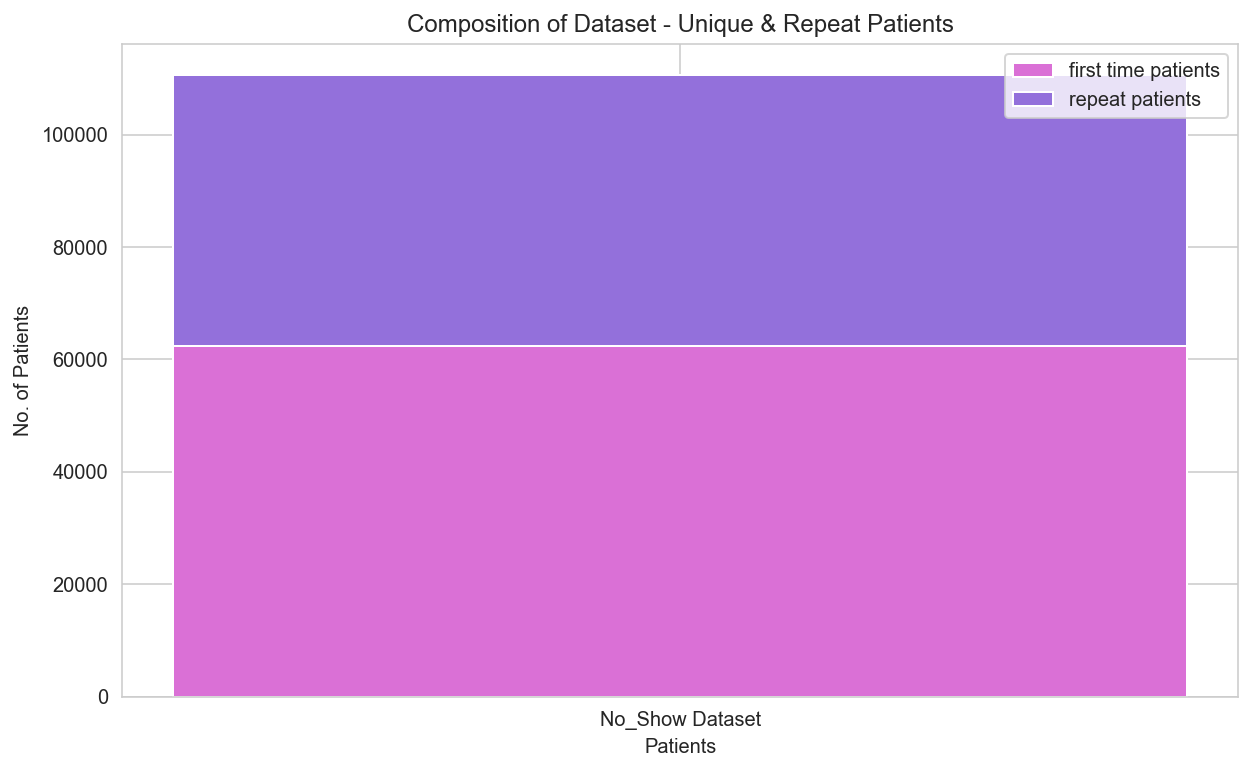

In [36]:
#creating stacked barchart to show unique v. repeat patients in the dataset

plt.figure(figsize = (10,6))

x = [1]
y_unique = df['patientid'].nunique()
y_repeat = df['patientid'].duplicated().sum()

plt.bar(x, y_unique, width = 0.6, color = 'orchid', label = 'first time patients')
plt.bar(x, y_repeat, width = 0.6, bottom = y_unique, color = 'mediumpurple', label = 'repeat patients')

plt.ylabel('No. of Patients')
plt.xlabel('Patients')
plt.title('Composition of Dataset - Unique & Repeat Patients')

plt.xticks(x,['No_Show Dataset'])

plt.legend();

There are _62,298_ unique PatientID values and _48,228_ duplicated PatientID values. This means that there are _48,228_ patients who have booked an appointment multiple times. 

Let us investigate if being a repeat patient (booking appointment multiple times) has any relation with being No_Show

In [37]:
#adding a new column for repeat patients
# True/1 = repeated, False/0 = not repeated

df['repeat_patient'] = df['patientid'].duplicated()

In [38]:
#check if the column was successfully added

df.head(1)

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show_val,repeat_patient
0,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,False


With the addition of the new column _repeat_patient_ the PatientID column is no longer required for analysis. This column can now be deleted from the DataFrame

In [39]:
#deleting patientid from the DataFrame

df.drop(['patientid'], axis = 1, inplace = True);

Currently the column _repeat_patient_ has values 'True' and 'False'. Converting these to 1 (True) and 0 (False) will help us in numeric computations.

We are going to use the previously defined function _boolean_convert_ for this operation

In [40]:
#converting repeat_patient values from True & False to 1 & 0

df['repeat_patient'] = df['repeat_patient'].apply(boolean_convert)

In [41]:
#check if the values were changed successfully

df['repeat_patient'].value_counts()

0    62298
1    48228
Name: repeat_patient, dtype: int64

In [42]:
#calculating the proportion of repeat_patients in the dataset

df.mean()['repeat_patient']

0.43634981814233753

We can now easily calculate that almost **43.6%** of the records in the dataset are of repeat_patients

In [43]:
#caclulating No_Show percentage in repeat patients

df.groupby('repeat_patient').mean()['no_show_val']

repeat_patient
0    0.195721
1    0.209961
Name: no_show_val, dtype: float64

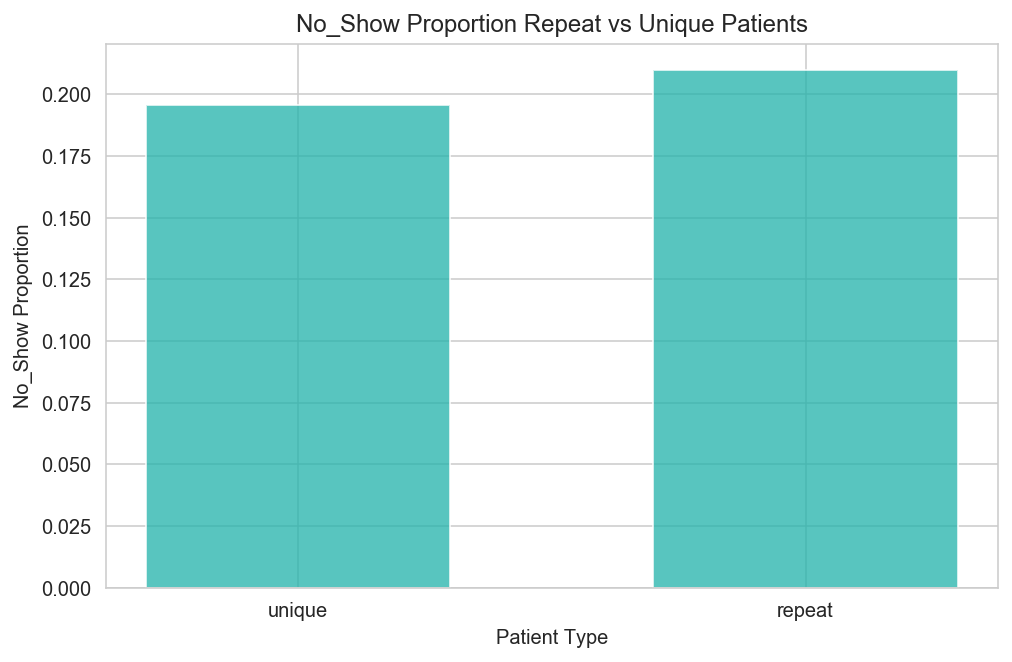

In [44]:
#plotting barchart to compare the no_show percentages in Repeat vs Unique Patients

repeat_patient_prop = df.groupby('repeat_patient').mean()['no_show_val']

plt.figure(figsize = (8,5))

plt.bar(repeat_patient_prop.index, repeat_patient_prop.values, alpha = 0.75, width = 0.6, color = 'lightseagreen')
plt.xlabel('Patient Type')
plt.ylabel('No_Show Proportion')
plt.xticks(repeat_patient_prop.index, ['unique', 'repeat'])
plt.title('No_Show Proportion Repeat vs Unique Patients');

The percentage of No_Shows in repeat patient was almost **21%**. This is higher than the No_Show percentage of **19.6%** among the patients coming in for a first time visit. 

It seems that being a **repeat patients are infact more likely to be No_Show**. 

In [45]:
#defining variable for repeat patient no show %

repeat_noshow = df.groupby('repeat_patient').mean()['no_show_val'][1]

In [46]:
#adding repeat patient no show value to the list

add_value('Repeat Patient', repeat_noshow)

(['Gender - Female', 'Repeat Patient'], [20.31, 21.0])

**C. Does being on Scholarship affect the likelihood of being No_Show**

According to the descriptive statistics calculated at the start of this section, almost **9.8%** of patients in the dataset are on the Government funded Social Welfare Program.

We will now investigate if being on scholarship i.e. being on the Social Welfare Program leads to patients being a No_Show more frequently as compared to not being on scholarship

In [47]:
#investigating if being on scholarship increases the % of being a No_Show

df.groupby('scholarship').mean()['no_show_val']

scholarship
0    0.198074
1    0.237363
Name: no_show_val, dtype: float64

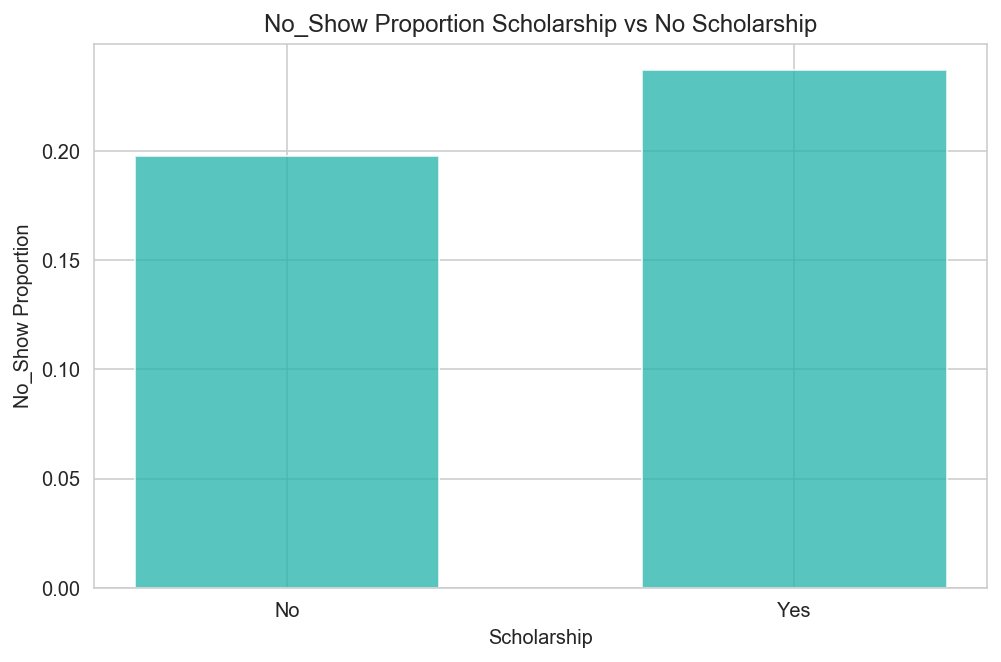

In [48]:
#plotting barchart to compare the no_show percentages in Scholarship vs No Scholarship

scholarship_prop = df.groupby('scholarship').mean()['no_show_val']

plt.figure(figsize = (8,5))

plt.bar(scholarship_prop.index, scholarship_prop.values, width = 0.6, alpha = 0.75, color = 'lightseagreen')
plt.xlabel('Scholarship')
plt.ylabel('No_Show Proportion')
plt.xticks(scholarship_prop.index, ['No', 'Yes'])
plt.title('No_Show Proportion Scholarship vs No Scholarship');

**23.7%** of patients on scholarship were found to be No_Show for their appointments. This is a definite increase as compared to the overall No_Show average of **_20.2%_**.

**Being on Scholarship certainly increases the likelihood of patients being a No_Show**.

In [49]:
#defining variable for scholarship no show %

scholarship_noshow = df.groupby('scholarship').mean()['no_show_val'][1]

In [50]:
#adding scholarship no show value to the list

add_value('Scholarship', scholarship_noshow)

(['Gender - Female', 'Repeat Patient', 'Scholarship'], [20.31, 21.0, 23.74])

**D. Do SMS reminders decrease the number of absences?**

There is a service through which the health service provider reacher out to the patient via SMS/message. Let's investigate if receiving communcation via SMS had any impact on being a No_Show

In [51]:
#Investigating SMS received impact on No_Show

df.groupby('sms_received').mean()['no_show_val']

sms_received
0    0.167035
1    0.275745
Name: no_show_val, dtype: float64

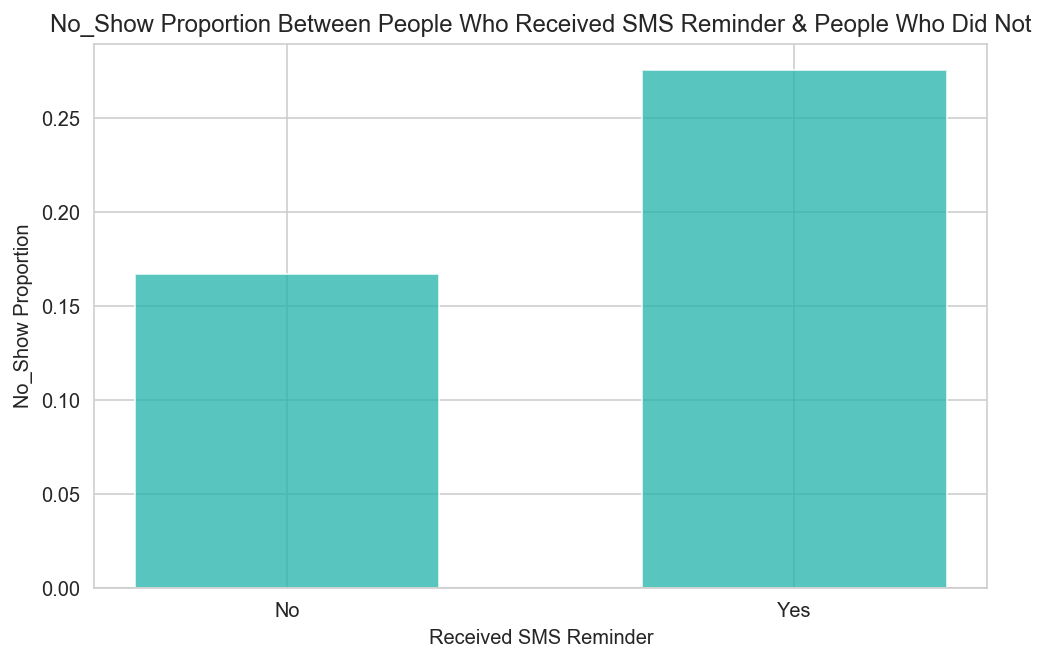

In [52]:
#plotting barchart to compare the no_show percentages in SMS Received vs No SMS Received

SMS_prop = df.groupby('sms_received').mean()['no_show_val']

plt.figure(figsize = (8,5))

plt.bar(SMS_prop.index, SMS_prop.values, width = 0.6, alpha = 0.75, color = 'lightseagreen')
plt.xlabel('Received SMS Reminder')
plt.ylabel('No_Show Proportion')
plt.xticks(SMS_prop.index, ['No', 'Yes'])
plt.title('No_Show Proportion Between People Who Received SMS Reminder & People Who Did Not');

Contrary to the initial assumption, people who received an SMS reminder/communication ended up being No_Show more frequently than people who did not receive any SMS reminder.

Patients who received communication via SMS had a No_Show percentage of **27.6%** compared to only **16.7%** among people who did not receive any SMS reminder at all.

We can conclude with that **_Receiving SMS Reminder has actually increased the chances to be a No_Show patient._**

In [53]:
#defining variable for no show patients % among people who received SMS 

sms_noshow = df.groupby('sms_received').mean()['no_show_val'][1]

In [54]:
#adding scholarship no show value to the list

add_value('SMS Rcvd', sms_noshow)


(['Gender - Female', 'Repeat Patient', 'Scholarship', 'SMS Rcvd'],
 [20.31, 21.0, 23.74, 27.57])

**E. Which Neighbourhoods have the highest No_Show proportions associated to them?**

The patients in the dataset belong to a number of neighbourhoods. These neighbourhoods are listed in the dataset alongside every patient entry. We can use this information to determine which neighbourhoods have the highest No_Show patients associated to them

In [55]:
#counting the number of neighbourhoods present in the dataset

df['neighbourhood'].nunique()

81

There are a total of _81_ neighbourhoods 

Next, we will investigate which neighbourhoods have the highest proportions of No_Show patients belonging to them

In [56]:
df.groupby('neighbourhood').mean().sort_values(by = 'no_show_val', ascending = False)

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show_val,repeat_patient
neighbourhood,,,,,,,,,
ILHAS OCEÂNICAS DE TRINDADE,54.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
SANTOS DUMONT,37.744514,0.184169,0.311129,0.109718,0.026646,0.010972,0.351097,0.289185,0.442790
SANTA CECÍLIA,40.904018,0.055804,0.323661,0.066964,0.000000,0.029018,0.399554,0.274554,0.457589
SANTA CLARA,37.581028,0.059289,0.201581,0.063241,0.025692,0.023715,0.322134,0.264822,0.454545
ITARARÉ,35.826693,0.088503,0.215993,0.075982,0.025612,0.019351,0.327547,0.262664,0.392146
...,...,...,...,...,...,...,...,...,...
SOLON BORGES,44.816631,0.076759,0.059701,0.002132,0.000000,0.012793,0.381663,0.147122,0.407249
MÁRIO CYPRESTE,36.873315,0.043127,0.148248,0.056604,0.037736,0.005391,0.229111,0.145553,0.463612
AEROPORTO,53.125000,0.000000,0.250000,0.000000,0.000000,0.000000,0.125000,0.125000,0.125000


One neighbourhood that is of particular interest from the list above is _ILHAS OCEÂNICAS DE TRINDADE_. It seems that not a single patient belonging to this neighbourhood showed up to their appointment i.e. 100% of patients were No_Show. 

Lets explore this neighbourhood further to check if we can identify why this is.

We will start by counting how many patients in the dataset belonged to this neighbourhood.

In [57]:
#count patients beloging to ILHAS OCEÂNICAS DE TRINDADE

df.query('neighbourhood == "ILHAS OCEÂNICAS DE TRINDADE"').groupby('neighbourhood').count()['age']

neighbourhood
ILHAS OCEÂNICAS DE TRINDADE    2
Name: age, dtype: int64

It turns out that there are only 2 entries associated to the _ILHAS OCEÂNICAS DE TRINDADE_ neighbourhood. 

This sample size is not enough to provide us a realistics measure of the patients' behaviour. 

We will filter out the results to only include neighbourhoods having 500 or more entries in order to get a reasonable measure of the patient behaviour w.r.t neighbourhoods

In [58]:
#count the number of entries per neighbourhood

neighbourhood_count = df.groupby('neighbourhood').count()['age']
neighbourhood_count

neighbourhood
AEROPORTO                 8
ANDORINHAS             2262
ANTÔNIO HONÓRIO         271
ARIOVALDO FAVALESSA     282
BARRO VERMELHO          423
                       ... 
SÃO JOSÉ               1977
SÃO PEDRO              2448
TABUAZEIRO             3132
UNIVERSITÁRIO           152
VILA RUBIM              851
Name: age, Length: 81, dtype: int64

In [59]:
#make a dataframe (table) with neighbourhoods and their respective entry counts

neighbourhood_count_df = pd.DataFrame({'name': neighbourhood_count.index, 'tot_entries': neighbourhood_count.values})
neighbourhood_count_df

,name,tot_entries
0,AEROPORTO,8
1,ANDORINHAS,2262
2,ANTÔNIO HONÓRIO,271
3,ARIOVALDO FAVALESSA,282
4,BARRO VERMELHO,423
...,...,...
76,SÃO JOSÉ,1977
77,SÃO PEDRO,2448
78,TABUAZEIRO,3132
79,UNIVERSITÁRIO,152


In [60]:
#adding the neighbourhood count to the original dataframe

df = df.merge(neighbourhood_count_df, left_on = 'neighbourhood', right_on = 'name', how = 'left')

#deleting the extra (neighbourhood)name column from the dataframe

df.drop('name', axis = 1, inplace = True)

#renaming the tot_entries column to fit the nomenclature of the original dataframe

df.rename(columns = {'tot_entries' : 'neighbourhood_count'}, inplace = True)

In [61]:
#filtering out top 5 no_show % among neighbourhoods having >500 entries

df[df['neighbourhood_count'] > 500].groupby('neighbourhood').mean().sort_values(by = 'no_show_val', ascending = False)['no_show_val'].head()

neighbourhood
SANTOS DUMONT        0.289185
SANTA CLARA          0.264822
ITARARÉ              0.262664
JESUS DE NAZARETH    0.243954
ILHA DO PRÍNCIPE     0.234775
Name: no_show_val, dtype: float64

The **top 5 neighbourhoods** in terms of most no_show patients proportions are:
1. **SANTOS DUMONT** - 28.9%
2. **SANTA CLARA** - 26.5% 
3. **ITARARÉ** - 26.3% 
4. **JESUS DE NAZARETH** - 24.4% 
5. **ILHA DO PRÍNCIPE** - 23.5% 

**Patients belonging to the above neighbourhoods have a no_show percentage which is significantly higher than the overall dataset (20.2%)**

**F. How is age affecting patient's absence?**

The dataset has patients ranging from 0 years to 115 years. The age is skewed to the right as shown in the histogram below:

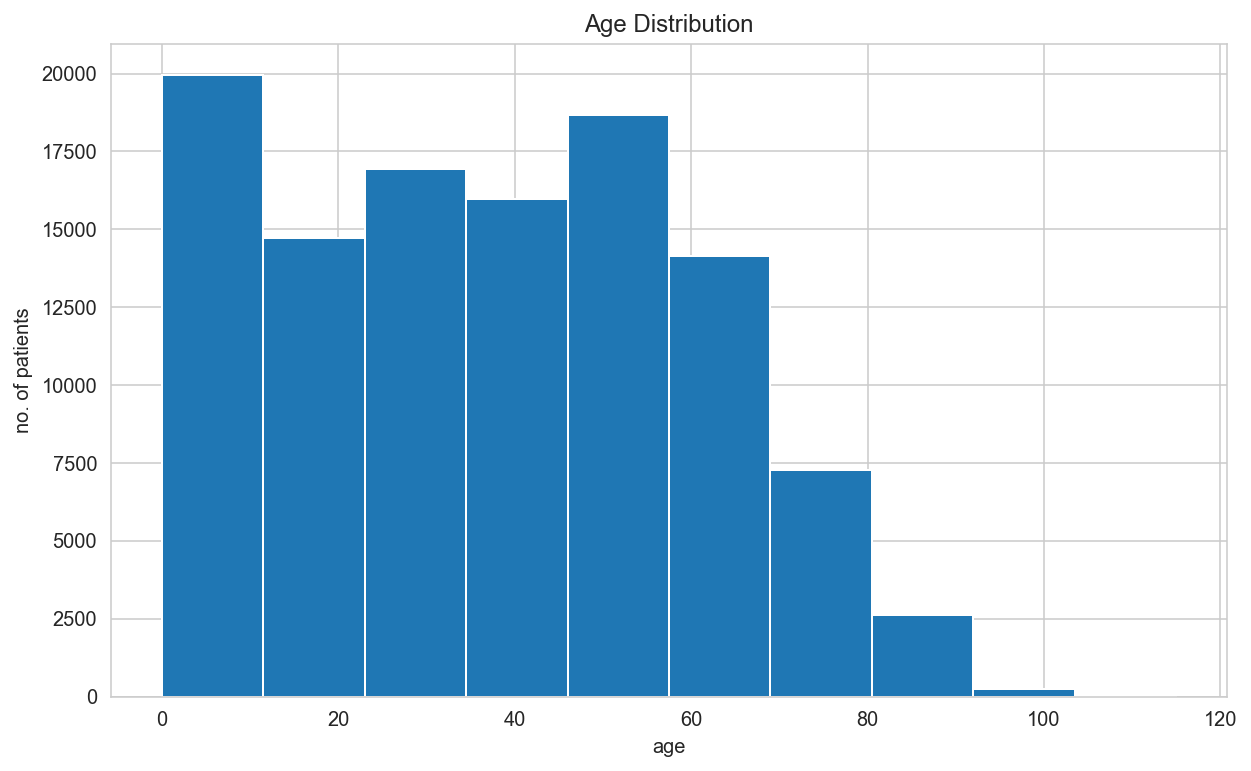

In [62]:
#histogram for age

df.hist('age', figsize = (10,6))
plt.title('Age Distribution')
plt.xlabel('age')
plt.ylabel('no. of patients');

In order to check how age affects the patients being a No_Show, we are going to divide the age into _3 categories_ :
1. Children - 0 to 17 years
2. Young Adults - 18 to 45 years
3. Old Adults - 46+ years

We are then going to investigate how patients in each age category behave w.r.t being No_Show

In [63]:
#creating bins for the age

age_bins = [df['age'].min(), 17, 45, df['age'].max()]

age_labels = ['children', 'young_adult', 'old_adult']

#dividing the dataset into three categories w.r.t age

df['age_bracket'] = pd.cut(df['age'], age_bins, labels = age_labels, right = True, include_lowest = True)

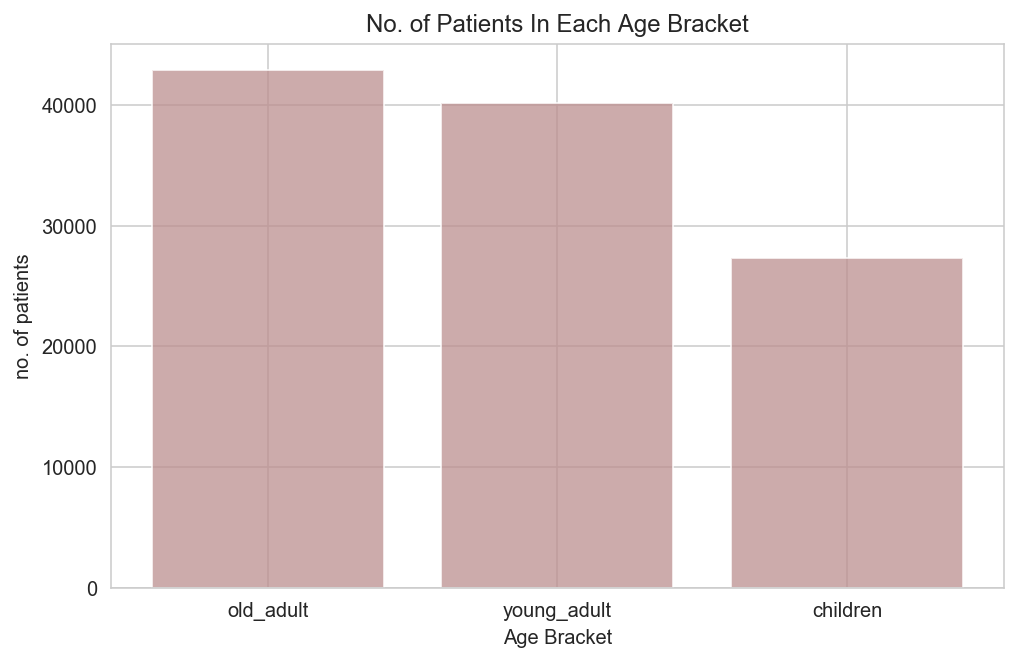

In [64]:
#visualising the number of patients in each age bracket

age_bracket_count = df['age_bracket'].value_counts()

plt.figure(figsize = (8,5))
plt.bar(age_bracket_count.index, age_bracket_count.values, alpha = 0.75, color = 'rosybrown')
plt.xlabel('Age Bracket')
plt.ylabel('no. of patients')
plt.title('No. of Patients In Each Age Bracket');

In [65]:
df.groupby('age_bracket').mean()['no_show_val']

age_bracket
children       0.219036
young_adult    0.228448
old_adult      0.166205
Name: no_show_val, dtype: float64

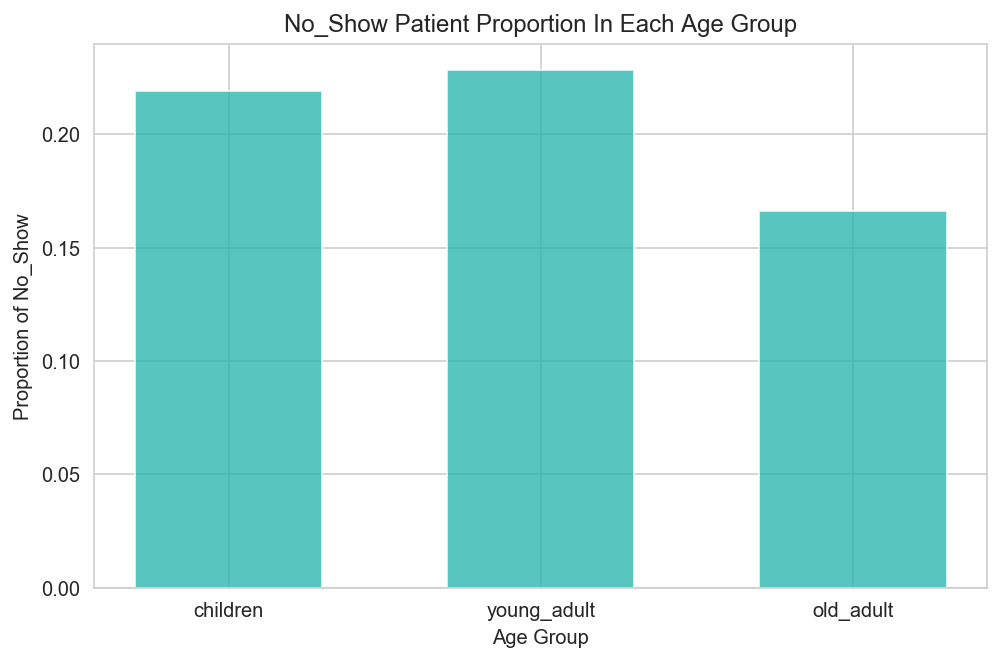

In [66]:
#visualising the proportion of No_Shows in each age group

age_group_prop = df.groupby('age_bracket').mean()['no_show_val']

plt.figure(figsize = (8,5))
plt.bar(age_group_prop.index, age_group_prop.values, width = 0.6, alpha = 0.75, color = 'lightseagreen')

plt.xlabel('Age Group')
plt.ylabel('Proportion of No_Show')
plt.xticks(age_group_prop.index)
plt.title('No_Show Patient Proportion In Each Age Group');

The No_Show proportion is highest among _**young adults**_ i.e. aged between 18 yrs to 45 yrs, with **22.8%** young adult patients reporting absent from their appointments.

_**Children**_ are second most susceptible to missing their appointments after young adults with **21.9%** children reporting as No_Show to their appointments

In [67]:
#defining variable for young adults no show %

young_adult_noshow = df.groupby('age_bracket').mean()['no_show_val']['young_adult']

In [68]:
#adding Age (young_adult) no show value to the list

add_value('Age - Young Adult', young_adult_noshow)


(['Gender - Female',
  'Repeat Patient',
  'Scholarship',
  'SMS Rcvd',
  'Age - Young Adult'],
 [20.31, 21.0, 23.74, 27.57, 22.84])

**G. Is the period between scheduled day and appointment day affecting the number of no-show appointments?**

Patients are usually expected to book an appointment before going to the medical practitioner. In this section we will investigate if booking the appointment in a certain time period before the actual consultation had any impact on the patients being a No_Show

We will divide the time before appointment into two categories:
1. Less Than A Week
2. More Than A Week

In [69]:
#calculating time before appointment 

df['time_before_app'] = df['appointmentday'] - df['scheduledday']

In [70]:
# creating bin limits and bin names for dividing time before appointment into two categories

time_bins = [df['time_before_app'].min(), pd.Timedelta(7, 'days'), df['time_before_app'].max()]

time_labels = ['less_than_week', 'more_than_week']

#dividing the dataset into two categories w.r.t time_before_app

df['time_before_app'] = pd.cut(df['time_before_app'], time_bins, labels = time_labels, right = True, include_lowest = True)

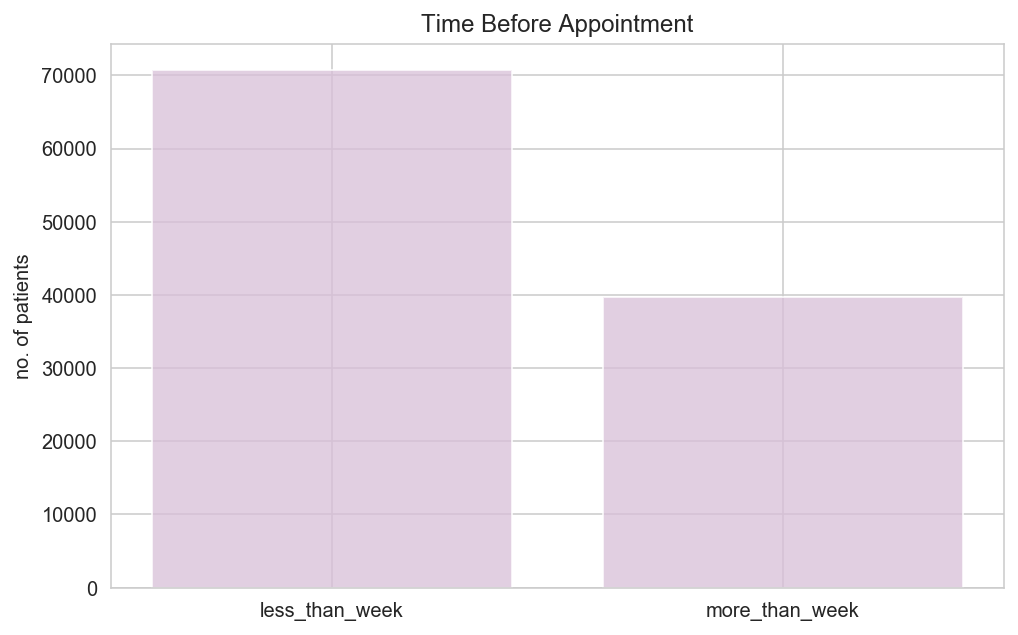

In [71]:
#visualising the number of patients in each category of time_before_appointment

time_before_app_count = df['time_before_app'].value_counts()
plt.figure(figsize = (8,5))
plt.bar(time_before_app_count.index, time_before_app_count.values, alpha = 0.75, color = 'thistle')
plt.ylabel('no. of patients')
plt.title('Time Before Appointment');

In [72]:
#calculating the no_show proprtions for each category of time_before_app

df.groupby('time_before_app').mean()['no_show_val']

time_before_app
less_than_week    0.135247
more_than_week    0.320561
Name: no_show_val, dtype: float64

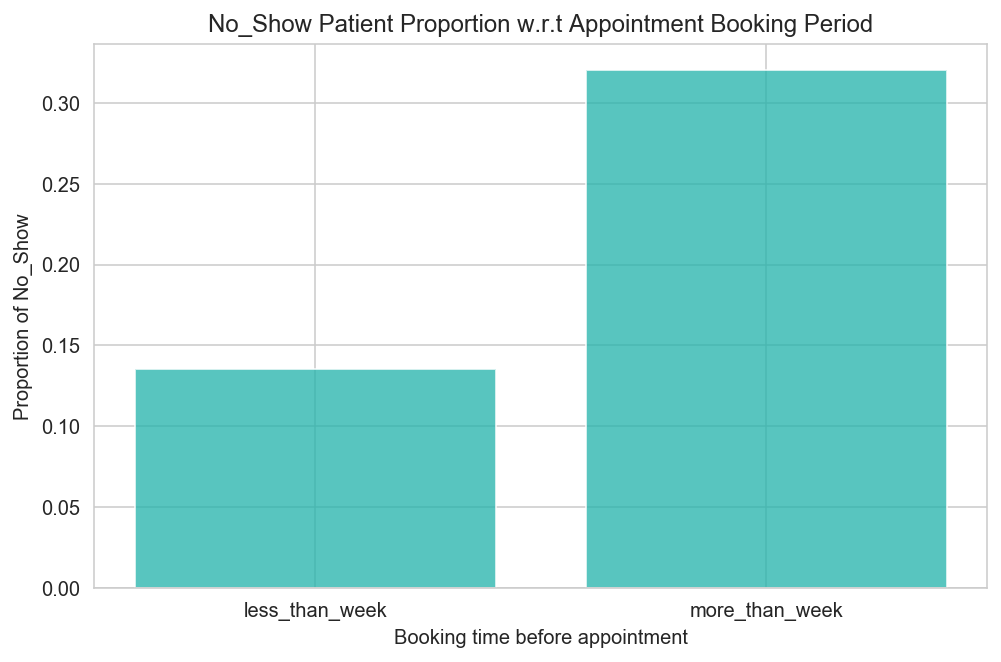

In [73]:
#visualising the proportion of No_Show patients in each category of time_before_appointment

time_before_app_prop = df.groupby('time_before_app').mean()['no_show_val']
plt.figure(figsize = (8,5))
plt.bar(time_before_app_prop.index, time_before_app_prop.values, alpha = 0.75, color = 'lightseagreen')
plt.xlabel('Booking time before appointment')
plt.ylabel('Proportion of No_Show')
plt.xticks(time_before_app_prop.index)
plt.title('No_Show Patient Proportion w.r.t Appointment Booking Period');

Patients who booked their appointments **more than a week before** the actual consultation are significantly more likely to not show up to their appointment with **32.1%** patients who fall in this category being a No_Show

In [74]:
#defining variable for time before appointment no show %

tba_noshow = df.groupby('time_before_app').mean()['no_show_val']['more_than_week']

In [75]:
#adding Time before appointment (more than a week) no show value to the list

add_value('App Book (> Week)', tba_noshow)


(['Gender - Female',
  'Repeat Patient',
  'Scholarship',
  'SMS Rcvd',
  'Age - Young Adult',
  'App Book (> Week)'],
 [20.31, 21.0, 23.74, 27.57, 22.84, 32.06])

**H. Are there any particular months in which No_Show appointments are more than others?**

We will explore which months had the highest No_Show of patients for their appointments

In [76]:
#extracting month from scheduled and appointment dates

df['scheduled_month'] = df['scheduledday'].apply(lambda x: x.month)
df['appointment_month'] = df['appointmentday'].apply(lambda x: x.month)

In [77]:
#calculating which appointment months had the highest No_Show

df.groupby('appointment_month').mean()['no_show_val']

appointment_month
4    0.195672
5    0.207865
6    0.184575
Name: no_show_val, dtype: float64

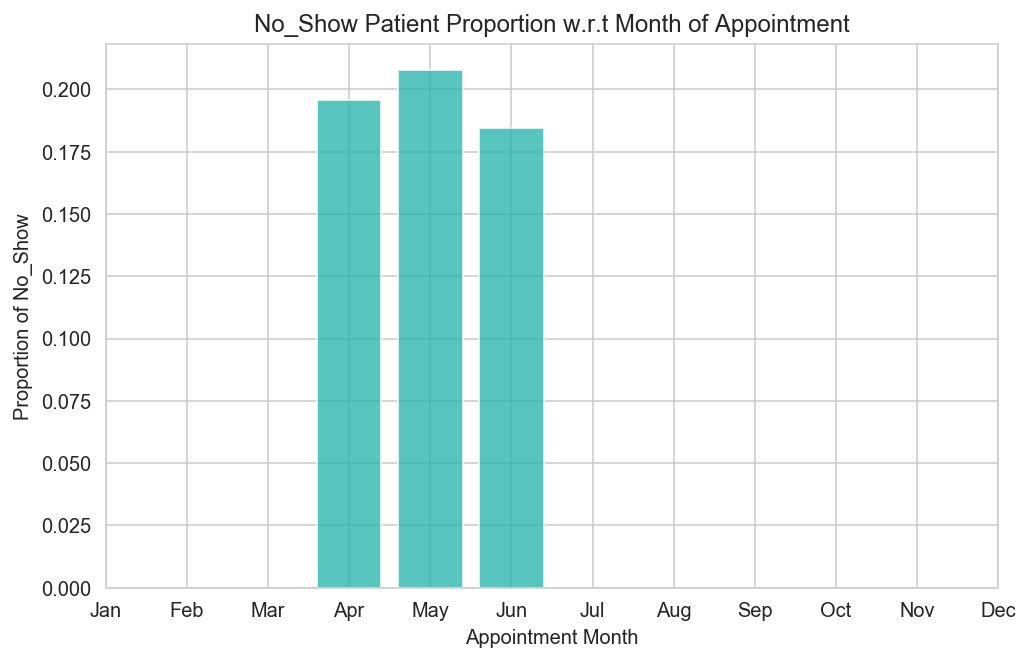

In [78]:
#visualising the proportion of No_Show patients according to the Month of Appointment

app_month_noshow = df.groupby('appointment_month').mean()['no_show_val']
plt.figure(figsize = (8,5))

plt.bar(app_month_noshow.index, app_month_noshow.values, alpha = 0.75, color = 'lightseagreen')
plt.xlabel('Appointment Month')
plt.ylabel('Proportion of No_Show')
plt.xticks(list(range(1,13)), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('No_Show Patient Proportion w.r.t Month of Appointment');

Interestingly, the actual appointments were only booked for three months of the year: April, May, and June.

**May was the month with the highest No_Show to the appointments.**

**I. Appointments scheduled in which months led to the highest proportion of No_Shows?**

Going a step further, we will explore which months were the appointments booked in, hoping to find the months in which the most No_Show appointments were booked.

In [79]:
#calculating which scheduled months had the highest No_Show

df.groupby('scheduled_month').mean()['no_show_val']

scheduled_month
1     0.300000
2     0.291815
3     0.330935
4     0.309760
5     0.174560
6     0.100807
11    0.000000
12    0.311475
Name: no_show_val, dtype: float64

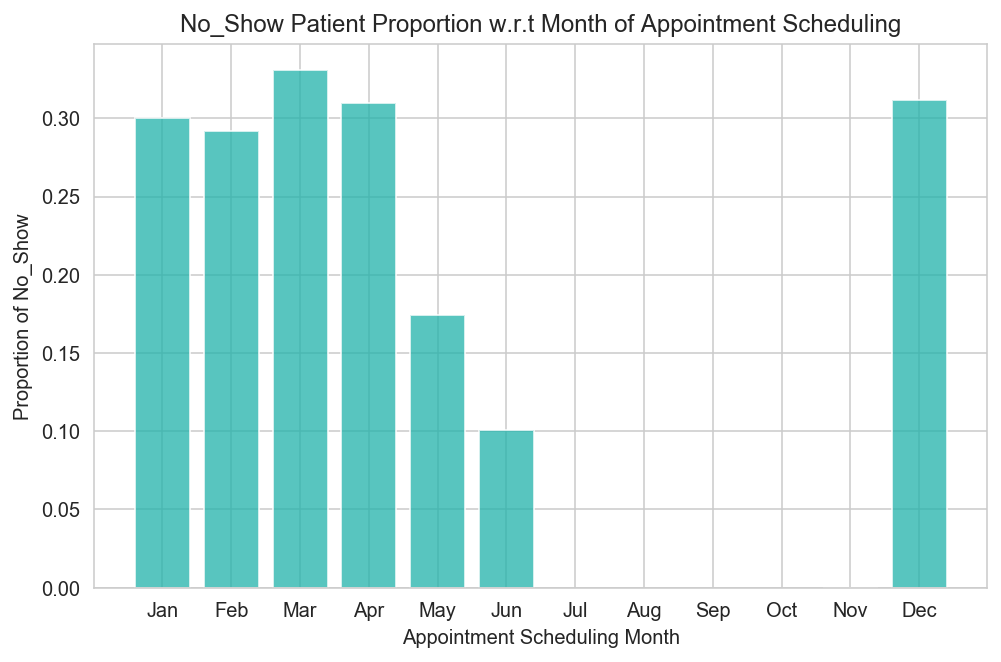

In [80]:
#visualising the proportion of No_Show patients according to the Month of Appointment Scheduling

booking_month_noshow = df.groupby('scheduled_month').mean()['no_show_val']
plt.figure(figsize = (8,5))

plt.bar(booking_month_noshow.index, booking_month_noshow.values, alpha = 0.75, color = 'lightseagreen')
plt.xlabel('Appointment Scheduling Month')
plt.ylabel('Proportion of No_Show')
plt.xticks(list(range(1,13)), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('No_Show Patient Proportion w.r.t Month of Appointment Scheduling');

The bookings for the appointments were made in eight months. 

**The appointments scheduled in March ended up with the highest No_Show patients**

**J. Do patients with less diseases not show up to their appointments?**

There are 4 diseases listed in the dataset:
- Hipertension
- Diabetes
- Alcoholism
- (being) Handicap

We will explore how people who have none, one, or more of these diseases behave in terms of being No_Show to their consultation appointments.

In [81]:
#calculating the total number of disease a patient is suffering from

df['disease_count'] = df['hipertension'] + df['diabetes'] + df['alcoholism'] + df['handcap']

In [82]:
#Calculating the No_Show percentage for each category of disease_count

df.groupby('disease_count').mean()['no_show_val']

disease_count
0    0.209276
1    0.179275
2    0.178637
3    0.153722
4    0.307692
Name: no_show_val, dtype: float64

People with **all four diseases** seem to exhibit a significantly high proportion of No_Show at **30.8%** being No_Show to their appointments.

Patients having **none of these four diseases** exhibit the second highest proprtion of No_Show at **20.9%**

However, before we make any conclusions from this, let us first calculate how many patients are present in each category of disease_count

In [83]:
#calculating the number of patients in each disease_count category

df['disease_count'].value_counts()

0    84114
1    18123
2     7658
3      618
4       13
Name: disease_count, dtype: int64

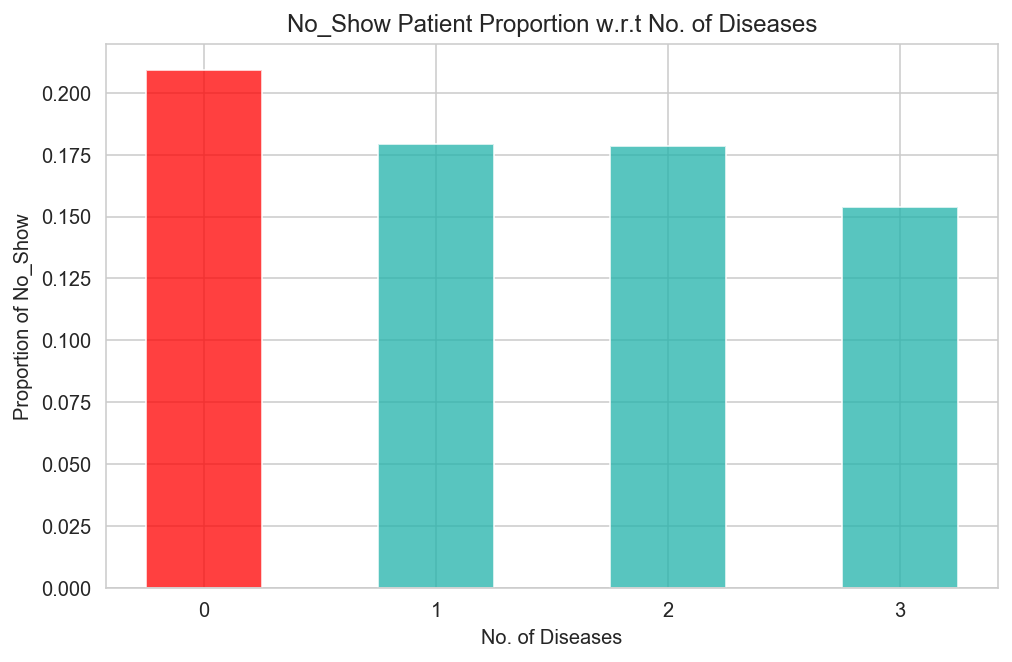

In [84]:
#visualising the proportion of No_Show patients according to the No. of diseases

disease_noshow = df.groupby('disease_count').mean()['no_show_val']
plt.figure(figsize = (8,5))

width = 0.5

plt.bar([0], disease_noshow.iloc[0], width = width, alpha = 0.75, color = 'red')
plt.bar([1,2,3], disease_noshow.iloc[1:4], width = width, alpha = 0.75, color = 'lightseagreen')
plt.xlabel('No. of Diseases')
plt.ylabel('Proportion of No_Show')
plt.xticks([0,1,2,3])
plt.title('No_Show Patient Proportion w.r.t No. of Diseases');

There are only 13 patients who report having all four diseases. This number compared to the complete sample size of the whole dataset is too small to be termed as a significant factor for No_Show.

We will therefore disregard this and only conclude that **people having no diseases tend to be No_Show more frequently than others with a No_Show percetage at 20.9%**

In [85]:
#defining variable for no. of diseases no show %

disease_noshow = df.groupby('disease_count').mean()['no_show_val'][0]

In [86]:
#adding No. of Diseases value to the list

add_value('Diseases (0)', disease_noshow)


(['Gender - Female',
  'Repeat Patient',
  'Scholarship',
  'SMS Rcvd',
  'Age - Young Adult',
  'App Book (> Week)',
  'Diseases (0)'],
 [20.31, 21.0, 23.74, 27.57, 22.84, 32.06, 20.93])

A barchart comparing the most common factors for high No_Show appointments will provide us a clearer picture of the characteristics of No_Show patients

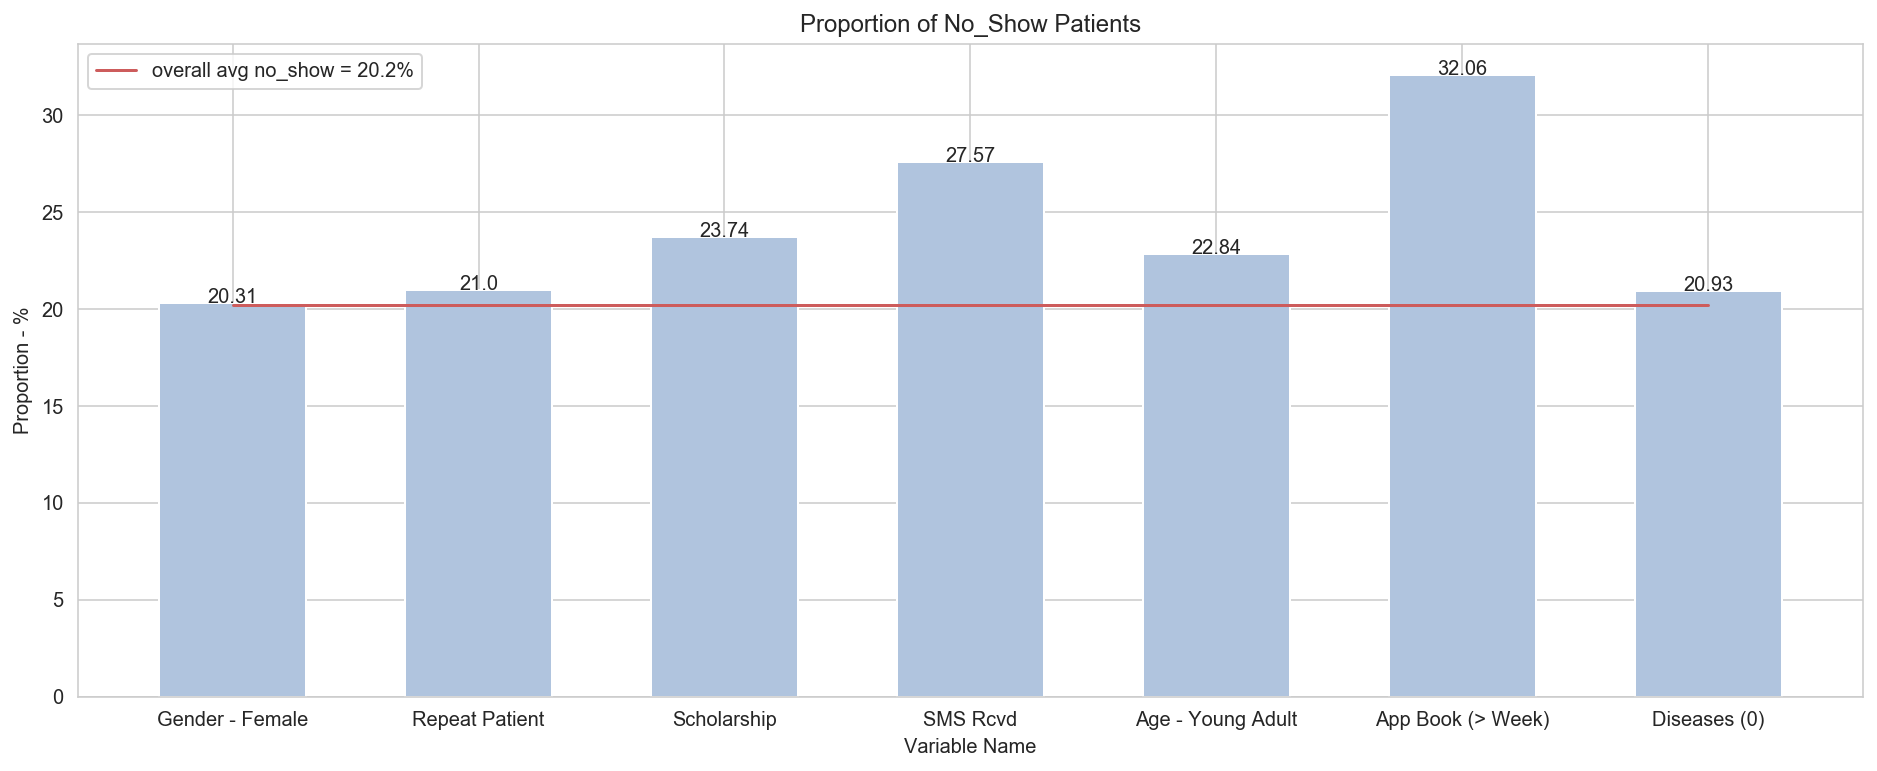

In [87]:
#plotting barchart for comparison

plot_barchart()

### Summarising the answers to the questions about the factors which contribute to an increase in the likelihood of a patient being a No_Show to their appointment:

    A. Are no show appointments associated with a certain gender
Yes. _Females_ are more likely to be No_Show than male patients.

    B. Are Repeat Patients less likely to be No_Show 
No. A person coming for a _repeat appointment_ is actually more likely to be No_Show.

    C. Does being on Scholarship affect the likelihood of being No_Show
Yes. People on the Governement Social Welfare program are more likely to not show up to their appointment.

    D. Do SMS reminders decrease the number of absences?
Contrary to the initial intuition, people who are reported to have received SMS communication have been recorded to be more likely to be No_Shows.

    E. Which Neighbourhoods have the highest No_Show proportions associated to them?
The top 5 neighbourhoods with the highest No_Show patients are: _SANTOS DUMONT, SANTA CLARA, ITARARÉ, JESUS DE NAZARETH, and ILHA DO PRÍNCIPE_.

    F. How is age affecting patient's absence?
_Young Adults_ are most susceptible to be No_Shows followed by Children.

    G. Is the period between scheduled day and appointment day affecting the number of no-show appointments?
People who scheduled their appointments _more than a week in advance_ were more likely to miss their appointments.

    H. Are there any particular months in which No_Show appointments are more than others?
Appointments were only booked for 3 months of the year. Of these, _May_ had the highest proportion of No_Shows.    

    I. Which months were the appointments scheduled in which led to the highest proportion of No_Shows?
Appointments booked in march yielded the highest No_Shows.

    J. Do patients with less diseases not show up to their appointments?
Yes. Patients having no (0) major disease ended up not showing up to their appointments the most.

In [88]:
#defining top 5 neighbourhoods with the highest No_Show percentages

top_neighbourhood = pd.Series(['SANTOS DUMONT', 'SANTA CLARA', 'ITARARÉ', 'JESUS DE NAZARETH', 'ILHA DO PRÍNCIPE'])

In [89]:
#defining the df having all the variables contributing to an increase in the patients No_Show

noshow_df = df.query('gender == "F" and repeat_patient == 1 and scholarship == 1 and sms_received == 1 and neighbourhood in @top_neighbourhood and age_bracket == "young_adult" and time_before_app == "more_than_week" and disease_count == 0')


In [90]:
#calculating the no_show percentage when all the variables/conditions are met

noshow_df.mean()['no_show_val']

0.43283582089552236

In [91]:
#defining variable for all variables combined no show %

combined_noshow = noshow_df.mean()['no_show_val']

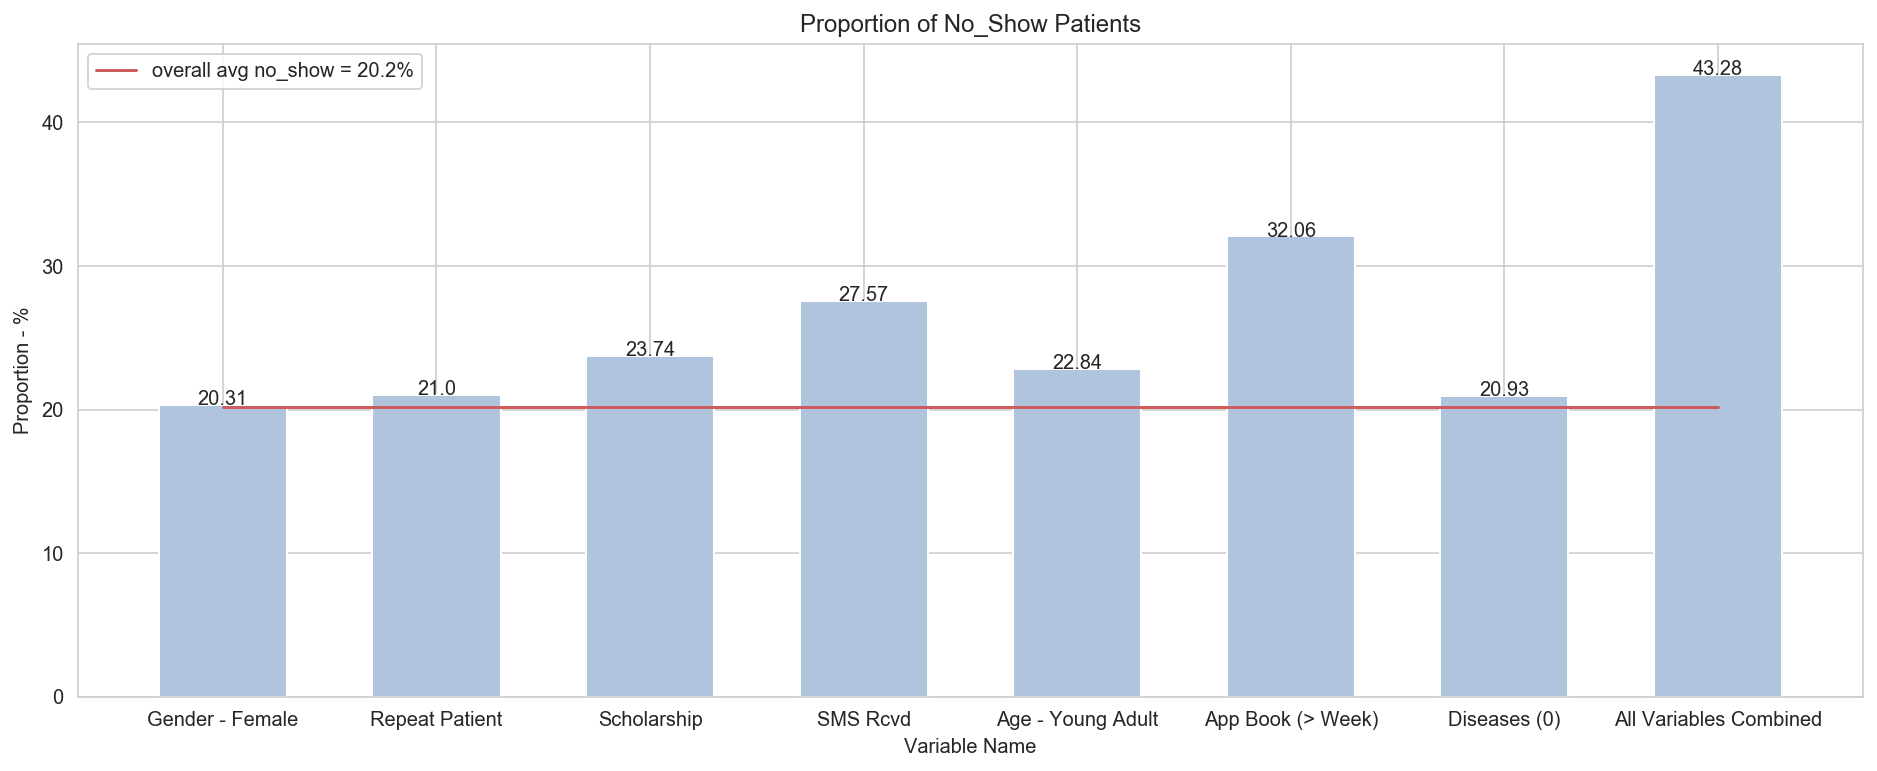

In [92]:
#adding no show value for all variables combined to the list

add_value('All Variables Combined', combined_noshow)

#plotting barchart for comparison

plot_barchart()

To summarize, the average No_Show percentage of the entire dataset was around __20.2%__. In comparison, among the patients who fulfilled all the variable conditions noted above, **43.3%** were found to be No_Show to their appointments

### Question 2 : What are the characteristics of people who are on Government Social Welfare Program (Scholarship)?

The Government is running a social welfare program to help individuals in need. It is important for the government agencies to understand the characteristics of the people who are on social welfare in order to design better targetted welfare programs.

We are going to filter the dataset to only include the patients who are on Scholarship i.e. Social Welfare Program

In [93]:
#filtering dataset to include only people on scholarship

df_scholar = df[df['scholarship'] == 1]

Using summary statistics, we are going to derive an overview of the patients on Scholarship

In [94]:
#describing summary statistics for the people on scholarship

df_scholar.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show_val,repeat_patient,neighbourhood_count,scheduled_month,appointment_month,disease_count
count,10861.000000,10861.0,10861.000000,10861.000000,10861.000000,10861.000000,10861.000000,10861.000000,10861.000000,10861.000000,10861.000000,10861.000000,10861.000000
mean,30.616242,1.0,0.173465,0.052389,0.048614,0.016389,0.322714,0.237363,0.467084,2238.248872,4.860326,5.206335,0.290857
std,17.408113,0.0,0.378666,0.222821,0.215070,0.126972,0.467536,0.425486,0.498938,1221.731255,0.675343,0.471919,0.584340
min,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.000000,1.000000,4.000000,0.000000
25%,16.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1398.000000,4.000000,5.000000,0.000000
50%,31.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2262.000000,5.000000,5.000000,0.000000
75%,43.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2773.000000,5.000000,5.000000,0.000000
max,84.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7717.000000,12.000000,6.000000,3.000000


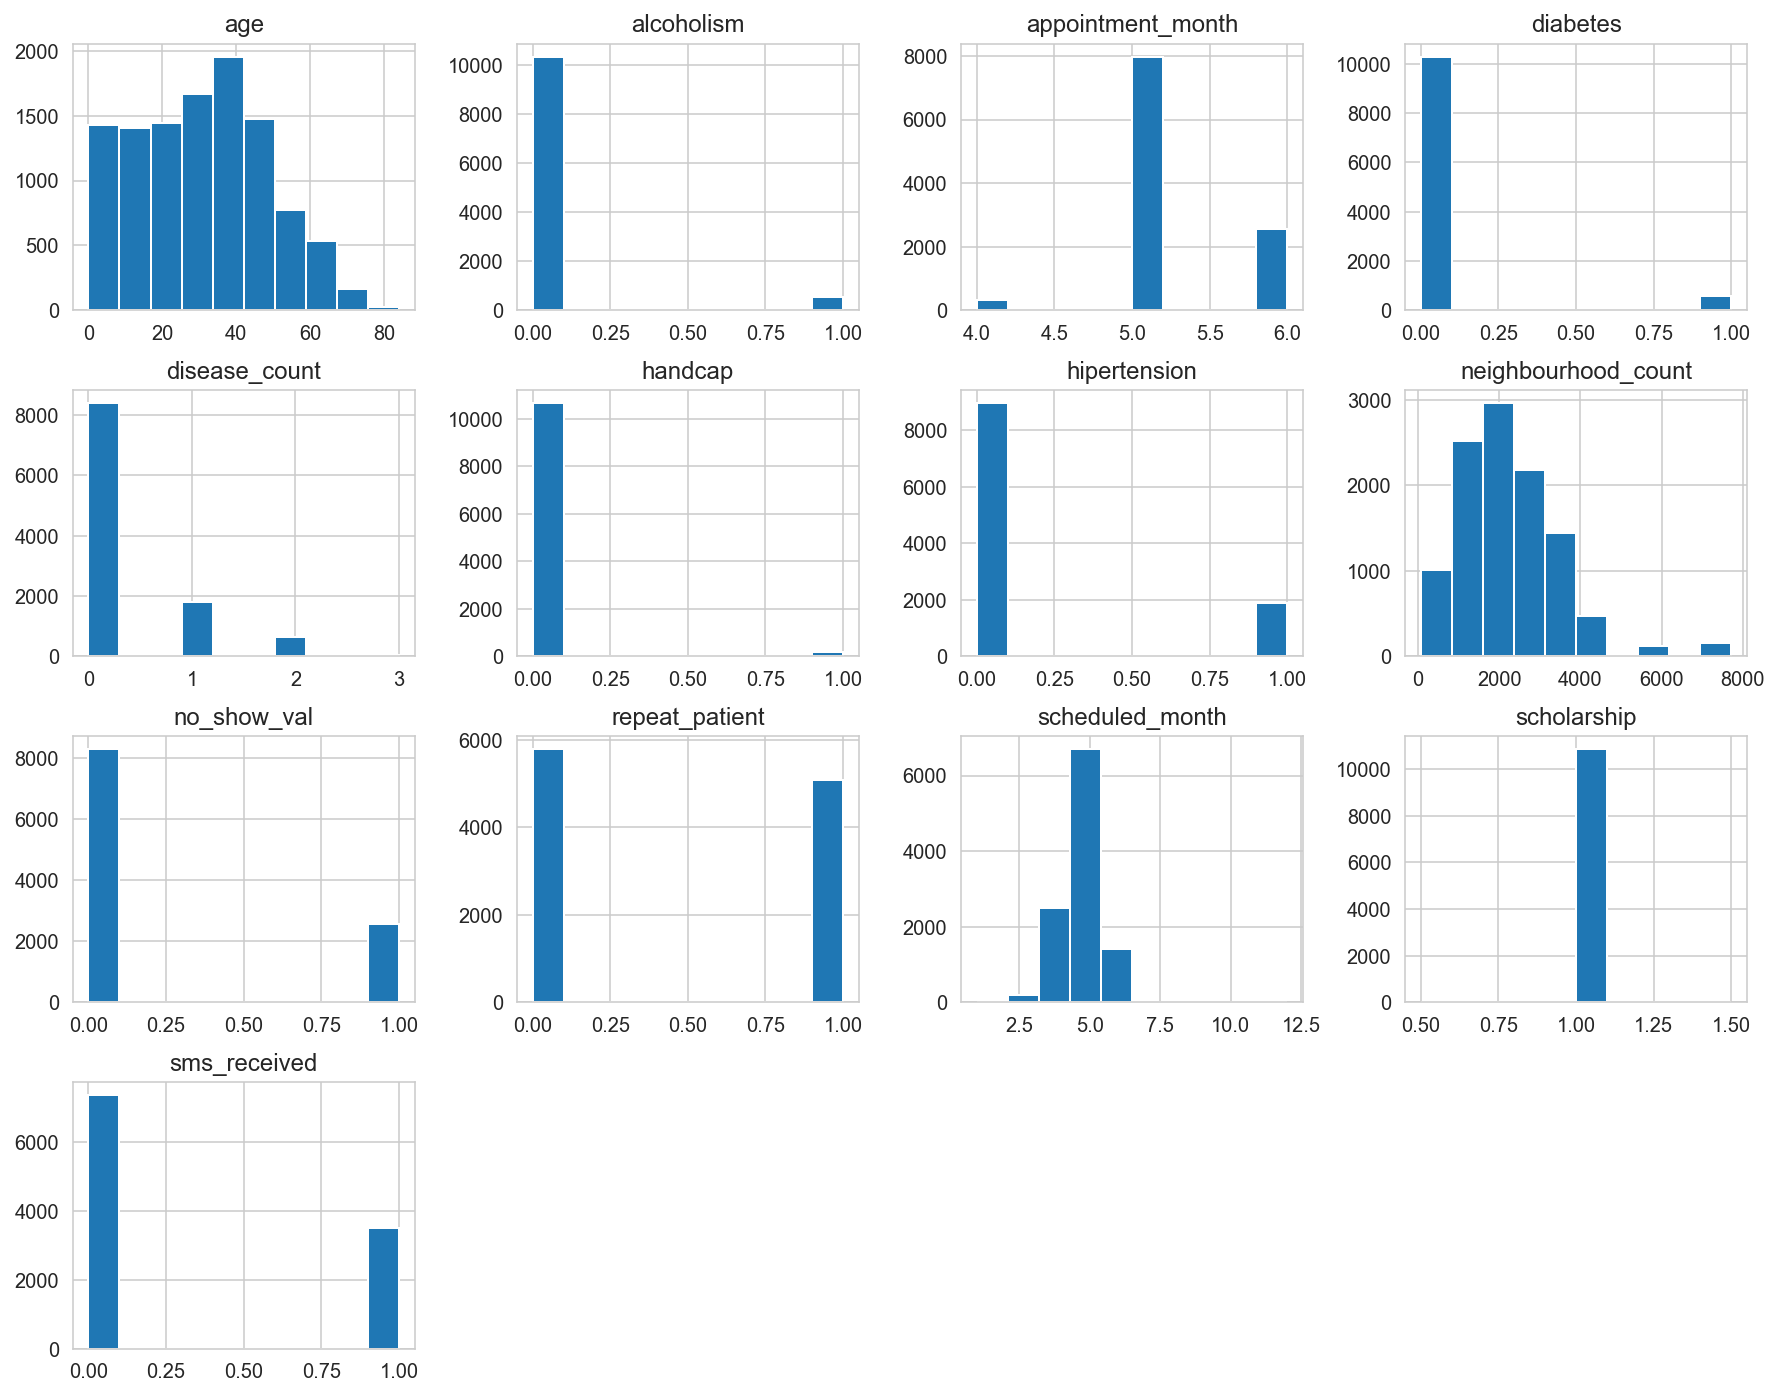

In [95]:
df_scholar.hist(figsize = (15,12));

**Observations**:

    - There are 10,861 patients who are on Scholarship
*Age*
    - The youngest person on Scholarship is 0 years old while the oldest is 84 years old. The average age for a patient on Scholarship is 30.6 years. 
    - The age is skewed to the right with 75% of the patients bring 43 years old or younger.
    
*Clinic Visit Bhaviour*
    - Almost half i.e. 46.7% of patients on scholarship have made more than one visit to the health practictioner
    - 23.7% of patients on scholarship have reported to not showing up to their consultation after booking an appointment

*Diseases*
    - Majority of patients suffer no major diseases.
    - Hipertension is the most common major disease with 17.3% people on scholarship reporting to suffer from it
    - Diabetes having a positivity ratio of 5.2% is the second most common disease among people on scholarship followed by alcoholism (4.9%) 
    - Only 1.6% people on scholarship report to be suffering from a handicap
    
*Communication with Health Clinic*
    - On average, 32.2% of people on scholarship have had communication with the health clinics via SMS/Messages




_**1. Gender Distribution**_

Let us observe how the Scholarship Patients are distributed in terms of _Gender_

In [96]:
#calculating total number of people on scholarship

print('The total number of people on Scholarship is {}'.format(df_scholar.count()['gender']))
print('This is {}% of the total dataset'.format(round(df_scholar.count()['gender']/df.count()['gender']*100,2)))

The total number of people on Scholarship is 10861
This is 9.83% of the total dataset


In [97]:
#number of people on scholarship w.r.t gender 

df_scholar.groupby('gender').count()['age']

gender
F    8853
M    2008
Name: age, dtype: int64

In [98]:
#proprtion of people on scholarship w.r.t gender 

scholar_gender = df_scholar.groupby('gender').count()['age']/df_scholar.count()['gender']
scholar_female = round(scholar_gender['F']*100, 2)
scholar_male = round(scholar_gender['M']*100, 2)
print('{}% of the patients on scholarship are Females while only {}% are Male'.format(scholar_female, scholar_male))

81.51% of the patients on scholarship are Females while only 18.49% are Male


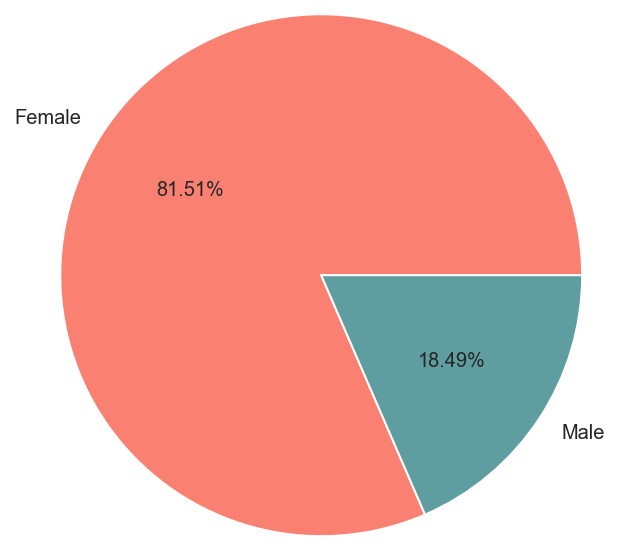

In [99]:
#plotting pie chart for gender proportions among patients on scholarship

size = scholar_gender.values
labels = 'Female', 'Male'
colors = 'salmon', 'cadetblue'

plt.pie(size, labels = labels, colors = colors, radius = 1.5, autopct='%1.2f%%');

_**2. Age Brackets**_

Previously we observed that the age is skewed to the right with 75% of the patients being 43 years or younger.
The youngest person on Scholarship is 0 years old while the oldest is 84 years old and the average age for a patient on Scholarship is 30.6 years. 

This is age distribution is demonstrated in the histogram below:

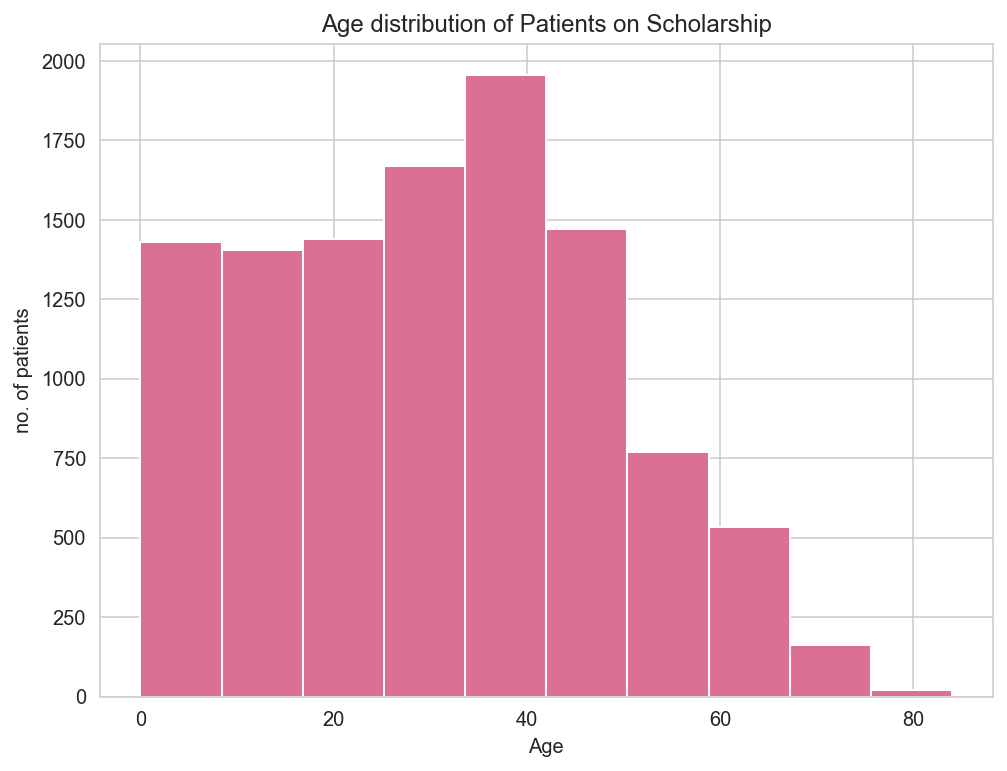

In [100]:
#histogram of age for patients on scholarship (overall)

df_scholar['age'].hist(figsize = (8,6), color = 'palevioletred')
plt.title('Age distribution of Patients on Scholarship')
plt.xlabel('Age')
plt.ylabel('no. of patients');

Diving into the dataset, let us explore how the ages for either _**Gender**_ are distributed.

In [101]:
#summary statistics for the age of Female patients on scholarship

df_scholar[df_scholar['gender'] == 'F']['age'].describe()

count    8853.000000
mean       33.099966
std        15.990291
min         0.000000
25%        21.000000
50%        34.000000
75%        44.000000
max        84.000000
Name: age, dtype: float64

In [102]:
#summary statistics for the age of Male patients on scholarship

df_scholar[df_scholar['gender'] == 'M']['age'].describe()

count    2008.000000
mean       19.665837
std        19.101423
min         0.000000
25%         6.000000
50%        11.000000
75%        27.000000
max        82.000000
Name: age, dtype: float64

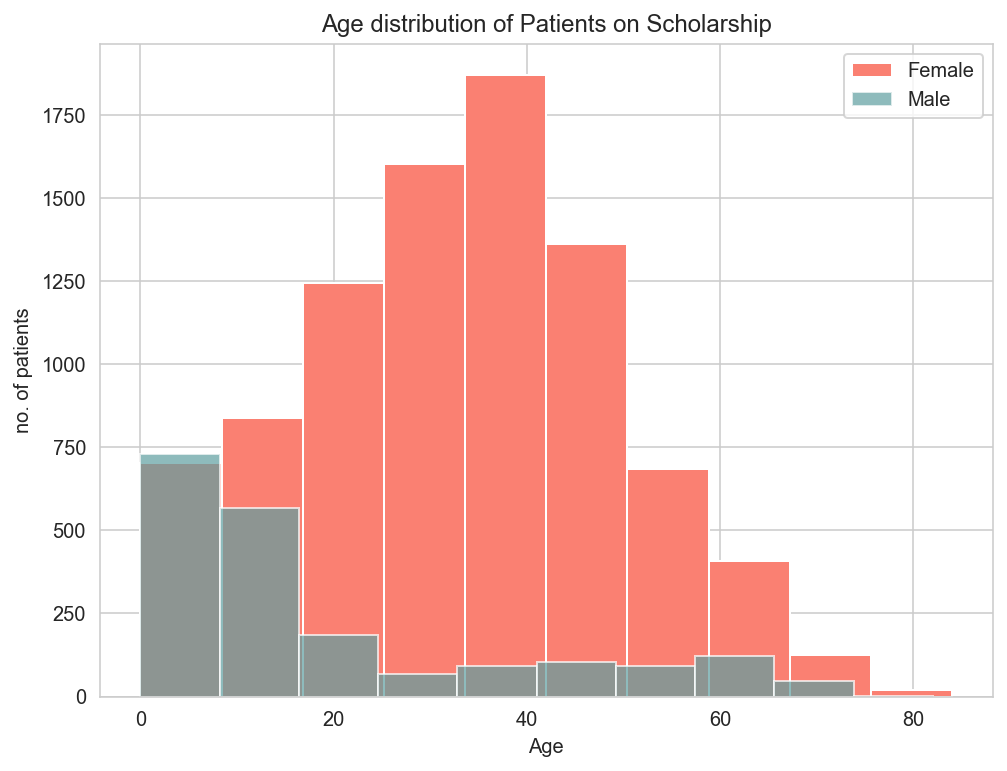

In [103]:
#histogram for age of male vs female patients on scholarship

df_scholar[df_scholar['gender'] == 'F']['age'].hist(figsize = (8,6), color = 'salmon', alpha = 1, label = 'Female')
df_scholar[df_scholar['gender'] == 'M']['age'].hist(figsize = (8,6), color = 'cadetblue', alpha = 0.7, label = 'Male')
plt.title('Age distribution of Patients on Scholarship')
plt.xlabel('Age')
plt.ylabel('no. of patients')
plt.legend();

The age of Males on scholarship is extremely skewed to the right while the age of Females on scholarship is only slightly skewed to the right. This is shown in the histogram above.

The youngest Male on scholarship is 0 years old while the oldest is 82 years old. The average age of a male on scholarship is 19.7 years with 75% males being 27 years or younger.

The youngest Female on scholarship is 0 years old while the oldest is 84 years old. The average age of a female on scholarship is 33.1 years with 75% females being 44 years or younger.

Let us now explore how the patients on scholarship are divided in terms of **Age Brackets**

In [104]:
#calculating age group proportion among the patients on scholarship

scholar_age_count = df_scholar.groupby('age_bracket').count()['age']

scholar_age_prop = round(df_scholar.groupby('age_bracket').count()['age']/df_scholar.count()['age'],2)
scholar_age_prop

age_bracket
children       0.28
young_adult    0.52
old_adult      0.20
Name: age, dtype: float64

In [105]:
#calculating age proportion in the overall dataset for comparison

overall_age_prop = round(df.groupby('age_bracket').count()['age']/df.count()['age'],2)


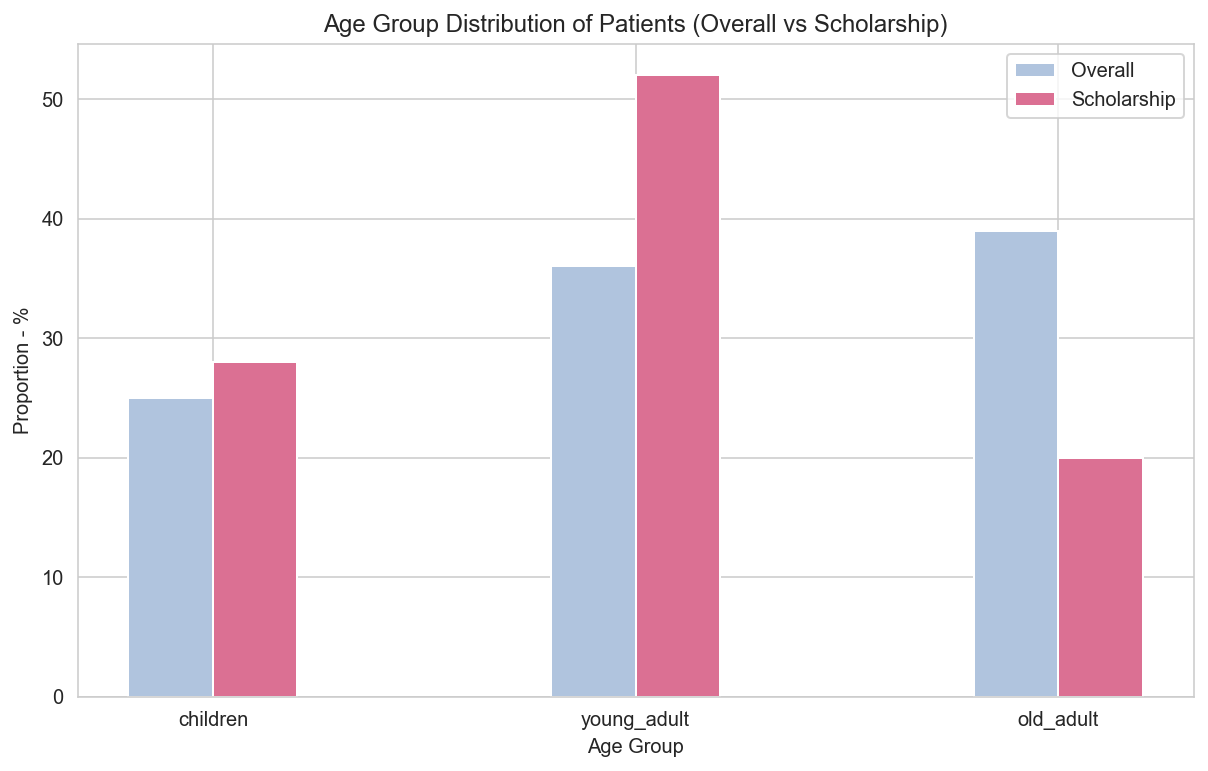

In [106]:
#plotting comparative barchart for Age Group Distribution among patients on scholarship

ind = np.arange(len(scholar_age_prop))
width = 0.2

plt.figure(figsize=(10,6))

# plot bars

overall_bars = plt.bar(ind, overall_age_prop*100, width, color='lightsteelblue', alpha=1, label='Overall')
scholar_bars = plt.bar(ind + width, scholar_age_prop*100, width, color='palevioletred', alpha=1, label='Scholarship')


# title and labels
plt.ylabel('Proportion - %')
plt.xlabel('Age Group')
plt.title('Age Group Distribution of Patients (Overall vs Scholarship)')
locations = ind + width / 2  # xtick locations
labels = scholar_age_prop.index  # xtick labels
plt.xticks(locations, labels)
# legend
plt.legend();

The proportion of Young adults and Children is relatively higher among people on scholarship as compared to the overall dataset.

Young Adults (aged between 18 years and 45 years) make up over half **(52%)** of the patients on scholarship.


Let us now explore the _age group distribution among both genders_.

In [107]:
#calculating count among age group - Females

scholar_age_count_f = df_scholar[df_scholar['gender']=='F'].groupby('age_bracket').count()['age']
scholar_age_count_f

age_bracket
children       1720
young_adult    5265
old_adult      1868
Name: age, dtype: int64

In [108]:
#calculating proportion among age group - Females

scholar_age_prop_f = round(df_scholar[df_scholar['gender']=='F'].groupby('age_bracket').count()['age']
                           /df_scholar[df_scholar['gender']=='F'].count()['age'],2)
scholar_age_prop_f

age_bracket
children       0.19
young_adult    0.59
old_adult      0.21
Name: age, dtype: float64

Over half **(59%)** of females on scholarship are _**young adults**_. 

In [109]:
#calculating count among age group - Males

scholar_age_count_m = df_scholar[df_scholar['gender']=='M'].groupby('age_bracket').count()['age']
scholar_age_count_m

age_bracket
children       1342
young_adult     353
old_adult       313
Name: age, dtype: int64

In [110]:
#calculating proportion among age group - Males

scholar_age_prop_m = round(df_scholar[df_scholar['gender']=='M'].groupby('age_bracket').count()['age']
                           /df_scholar[df_scholar['gender']=='M'].count()['age'],2)
scholar_age_prop_m

age_bracket
children       0.67
young_adult    0.18
old_adult      0.16
Name: age, dtype: float64

Most **(67%)** of the male on scholarship are _**children**_ i.e. under the age of 17 years.

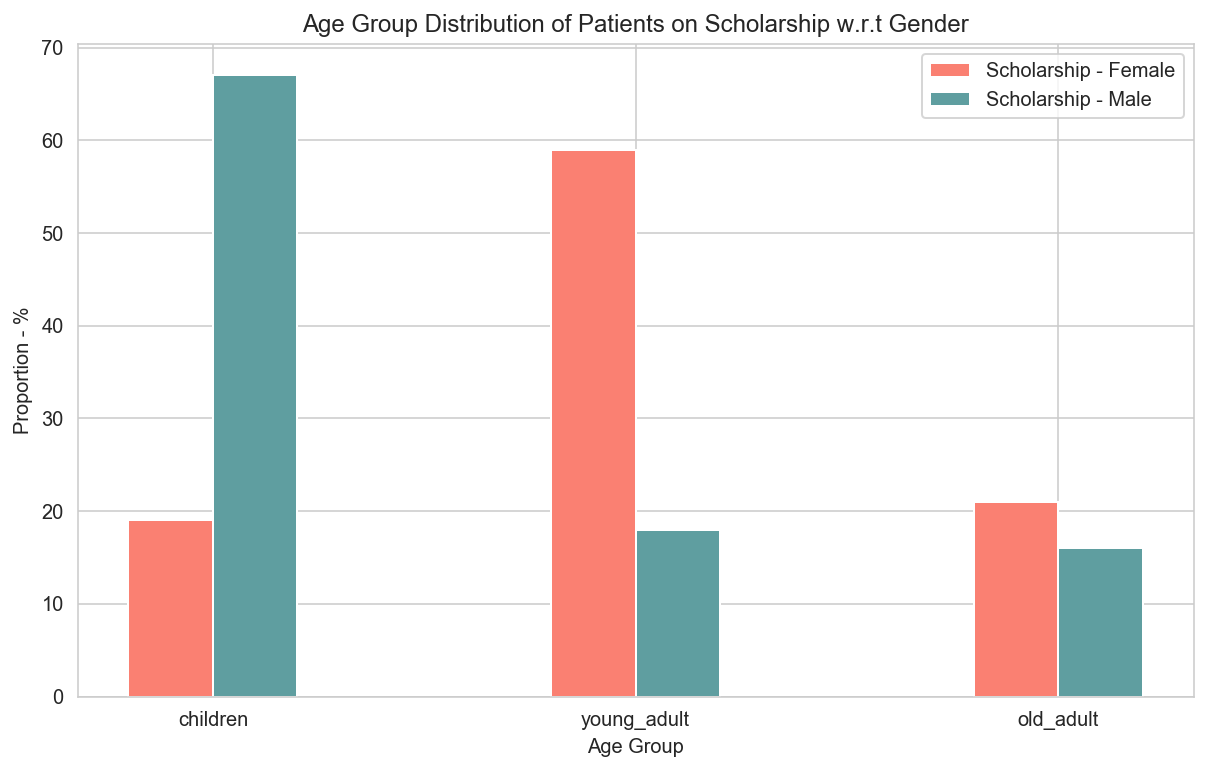

In [111]:
#plotting comparative barchart for Age Group Distribution among patients on scholarship

ind = np.arange(len(scholar_age_prop))
width = 0.2

plt.figure(figsize=(10,6))

# plot bars

female_bars = plt.bar(ind, scholar_age_prop_f*100, width, color='salmon', alpha=1, label='Scholarship - Female')
male_bars = plt.bar(ind + width, scholar_age_prop_m*100, width, color='cadetblue', alpha=1, label='Scholarship - Male')


# title and labels
plt.ylabel('Proportion - %')
plt.xlabel('Age Group')
plt.title('Age Group Distribution of Patients on Scholarship w.r.t Gender')
locations = ind + width / 2  # xtick locations
labels = scholar_age_prop.index  # xtick labels
plt.xticks(locations, labels)
# legend
plt.legend();

A comparative view of the Age Group Distribution among scholarship patients is shown in the bar chart above. 

There is a significantly higher proportion of male children than female children on scholarship.
Female young adults have a significantly higher proportion among scholarship patients as compared to the porportion of male adults.

_**3. Neighbourhood**_

There are 81 neighbourhoods in the dataset. We will now explore which neighbourhoods have the highest proportion of patients on Scholarship.

We will be comparing the scholarship proportion w.r.t. the neighbourhood with the scholarship proportion in the overall dataset which was _**9.8%**_ (from the exploratory data analysis obeservations)

In [112]:
#calculating the number of scholarship patients per neighbourhood

neighbourhood_count_scholar = df_scholar.groupby('neighbourhood').count()['age']

#calculating the number of total patients per neighbourhood

neighbourhood_count = df.groupby('neighbourhood').count()['age']

#calculating the proportion of scholarship patients per neighbourhood

neighbourhood_prop_scholar = neighbourhood_count_scholar / neighbourhood_count

In [113]:
#calculating the count of neighbourhoods having scholarship levels more than the mean scholarship of the dataset

#mean scholarship
mean_scholarship = df.describe()['scholarship']['mean']

#calculate the count of neighbourhoods
neighbourhood_prop_scholar[neighbourhood_prop_scholar>mean_scholarship].count()

36

**36** out of 81 neighbourhoods have a higher scholarship rate than the average scholarship rate of _9.8%_

In [114]:
#filtering the top 5 neighbourhoods with the highest scholarship patients proportion

highest_scholar_neighbourhood = round(neighbourhood_prop_scholar.sort_values(ascending = False).head(),2)
highest_scholar_neighbourhood

neighbourhood
SÃO BENEDITO        0.28
DO MOSCOSO          0.27
ILHA DO PRÍNCIPE    0.26
PIEDADE             0.25
SANTOS REIS         0.22
Name: age, dtype: float64

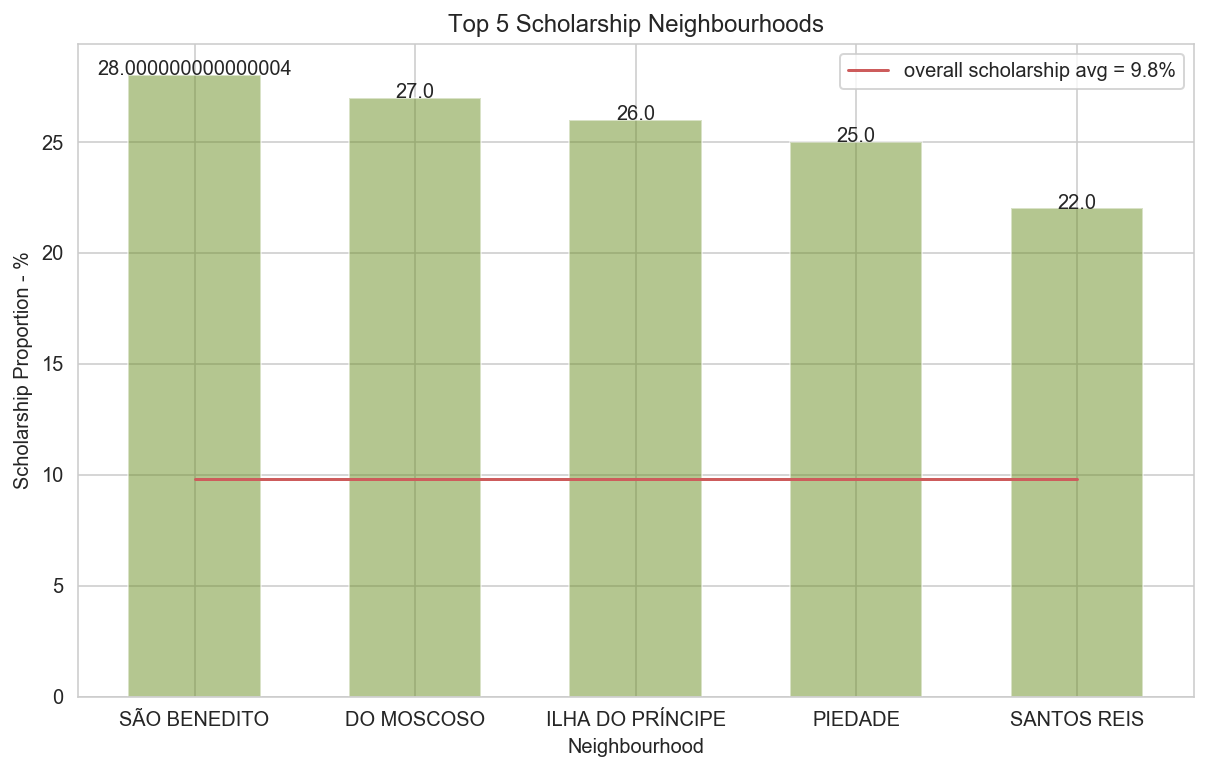

In [115]:
#plotting the top 5 scholarship neighbourhoods 

x = highest_scholar_neighbourhood.index
y = highest_scholar_neighbourhood*100
plt.figure(figsize = (10,6)) #setting the figure size

#adding a line for the overall scholarship average
plt.plot(x,np.repeat(9.8,len(x)), color = 'indianred', label = 'overall scholarship avg = 9.8%')
plt.legend()

plt.bar(x,y, width = 0.6, alpha = 0.5, color = 'olivedrab') 
bar_labels(x,y)
plt.title('Top 5 Scholarship Neighbourhoods')
plt.xlabel('Neighbourhood')
plt.ylabel('Scholarship Proportion - %');

The top 5 neighbourhoods with the highest proportion of patients on scholarship are:
1. SÃO BENEDITO        28%
2. DO MOSCOSO          27%
3. ILHA DO PRÍNCIPE    26%
4. PIEDADE             25%
5. SANTOS REIS         22%

The scholarship proportions in these neighbourhoods are well over the total average scholarship of the dataset of 9.8%

_**4. Diseases**_

There are 4 major diseases recorded in the dataset:
- Hipertension
- Diabetes
- Alcoholism
- Handicap

We will explore how these diseases are distributed among people who are on Scholarship

In [116]:
#defining a function to get details of disease proportion 

def disease_prop (disease):
    
    #calculating the disease proportion w.r.t. gender among scholarship patients
    disease_count = df_scholar[df_scholar[disease] == 1].groupby('gender').count()['age']
    tot_count = df_scholar.groupby('gender').count()['age']
    proportion = round(disease_count/tot_count,4)
    
    #calculating the avg disease proportion in the overall dataset
    overall_avg = round(df.describe()[disease]['mean'],4)
    
    #calculating the avg disease proportion in all the scholarship patients overall
    scholarship_avg = round(df_scholar.describe()[disease]['mean'],4)
    
    return (proportion, overall_avg, scholarship_avg)

In [117]:
#getting all proportions for hipertension

hiper_scholar_gender, hiper_overall, hiper_scholar = disease_prop('hipertension')

#getting all proportions for diabetes

diab_scholar_gender, diab_overall, diab_scholar = disease_prop('diabetes')

#getting all proportions for alcoholism

alcohol_scholar_gender, alcohol_overall, alcohol_scholar = disease_prop('alcoholism')

#getting all proportions for handicap

handcap_scholar_gender, handcap_overall, handcap_scholar = disease_prop('handcap')

In [118]:
disease_overall = [hiper_overall, diab_overall, alcohol_overall, handcap_overall]
disease_scholar = [hiper_scholar, diab_scholar, alcohol_scholar, handcap_scholar]

In [119]:
ind = np.arange(4)
width = 0.2

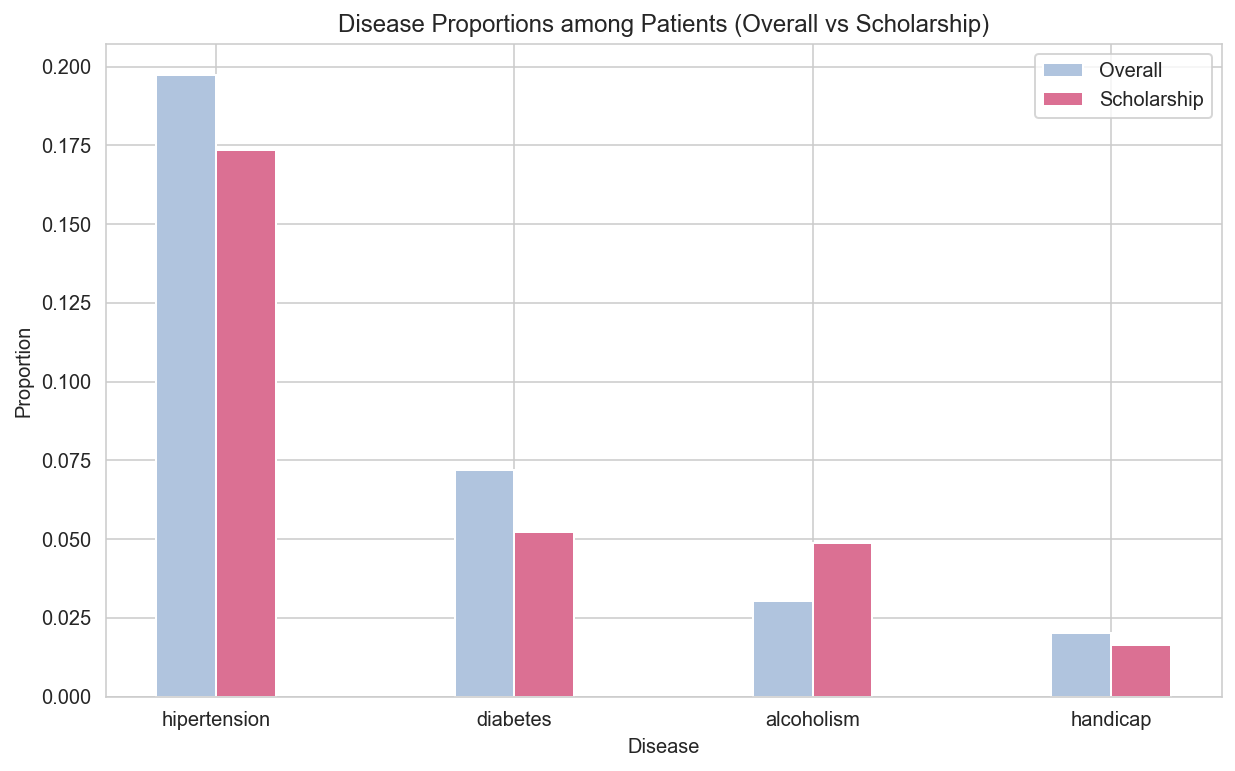

In [120]:
#plotting bar chart comparing disease % overall vs among people on scholarship

plt.figure(figsize=(10,6))

# plot bars

overall_bars = plt.bar(ind, disease_overall, width, color='lightsteelblue', alpha=1, label='Overall')
scholar_bars = plt.bar(ind + width, disease_scholar, width, color='palevioletred', alpha=1, label='Scholarship')


# title and labels
plt.ylabel('Proportion')
plt.xlabel('Disease')
plt.title('Disease Proportions among Patients (Overall vs Scholarship)')
locations = ind + width / 2  # xtick locations
labels = ['hipertension', 'diabetes', 'alcoholism', 'handicap']  # xtick labels
plt.xticks(locations, labels)
# legend
plt.legend();

The proportion of people suffering major diseases is lower among people on Scholarship for all major diseases except Alcoholism. 

_It seems that people on Scholarship tend to suffer more from **Alcoholism** as compared to the overall dataset._

In [121]:
disease_scholar_f = [hiper_scholar_gender['F'], diab_scholar_gender['F'], alcohol_scholar_gender['F'], handcap_scholar_gender['F']]
disease_scholar_m = [hiper_scholar_gender['M'], diab_scholar_gender['M'], alcohol_scholar_gender['M'], handcap_scholar_gender['M']]

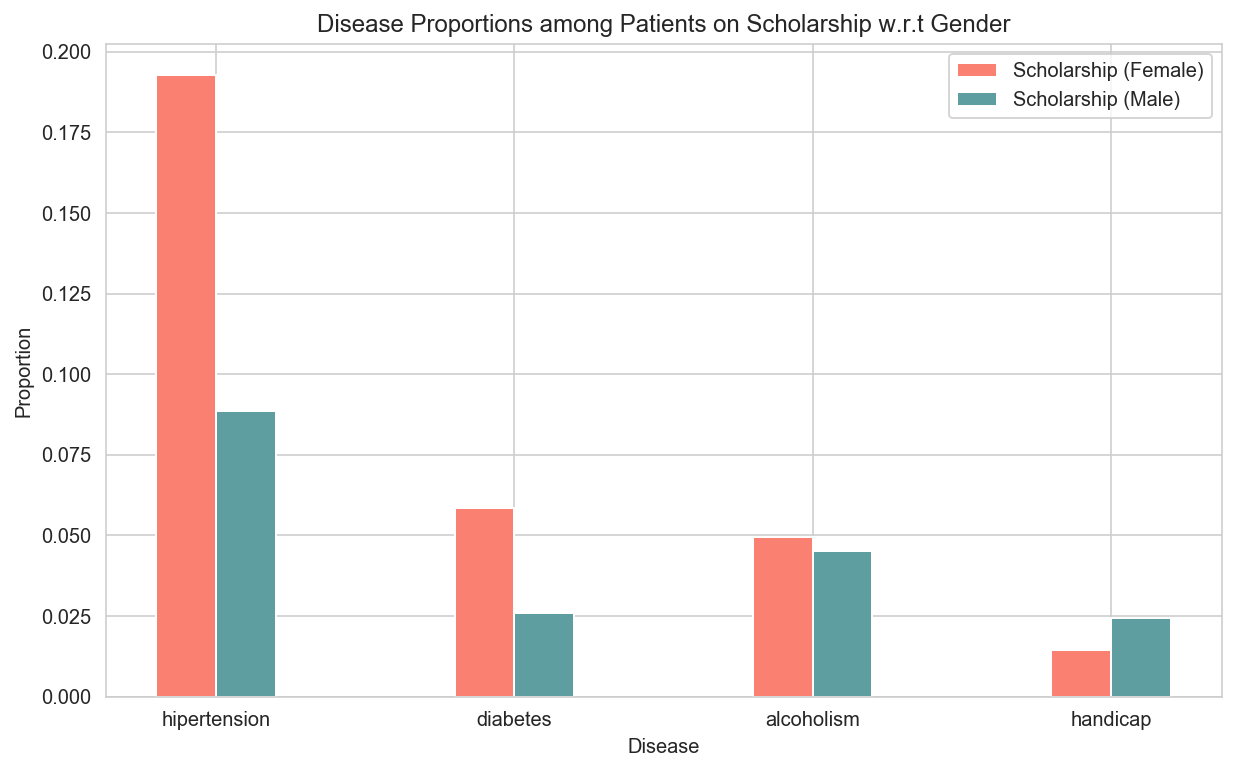

In [122]:
#plotting barchart for disease proportiongs among patients on scholarship

plt.figure(figsize=(10,6))


# plot bars

scholar_f_bars = plt.bar(ind, disease_scholar_f, width, color='salmon', alpha=1, label='Scholarship (Female)')
scholar_m_bars = plt.bar(ind + width, disease_scholar_m, width, color='cadetblue', alpha=1, label='Scholarship (Male)')


# title and labels
plt.ylabel('Proportion')
plt.xlabel('Disease')
plt.title('Disease Proportions among Patients on Scholarship w.r.t Gender')
locations = ind + width / 2  # xtick locations
labels = ['hipertension', 'diabetes', 'alcoholism', 'handicap']  # xtick labels
plt.xticks(locations, labels)
# legend
plt.legend();

Diving into how the diseases are distributed w.r.t gender among the people on Scholarship we find that Females suffer from more major diseases than males. _There is a significantly higher proportion of females suffering from **hipertension** and **diabetes** as compared to males among patients who are on scholarship._

Males, however, are more likely to be handicapped than females.

<a id='conclusions'></a>
## Conclusions

Two questions were explored in the analysis exercise:
1. _What factors contribute to a patient not showing up for their consultation after booking an appointment_
2. _What are the characteristics of people who are on Government Social Welfare Program (Scholarship)?_


**- Factors contributing to a patient not showing up for their consultation after booking an appointment**

The dataset had information about **110,527** patients. Of these patients **20.2%** were reported to have missed their appointment after booking it. These patients were called _"No_Show Patients"_.

Several factors were explored to try to understand the characteristics of No_Show patients with the hope that it could be determined which factors/variables contributed to increasing the likelihood of patients being No_Show.

The questions asked about these variables yielded the following results;

- _Females_ are more likely to be No_Show than male patients.
- A person coming for a _repeat appointment_ is actually more likely to be No_Show.
- People on the Governement Social Welfare program are more likely to not show up to their appointment.
- Contrary to the initial intuition, people who are reported to have received SMS communication have been recorded to be more likely to be No_Shows.
- The top 5 neighbourhoods with the highest No_Show patients are: _SANTOS DUMONT, SANTA CLARA, ITARARÉ, JESUS DE NAZARETH, and ILHA DO PRÍNCIPE_.
- _Young Adults_ are most susceptible to be No_Shows followed by Children.
- People who scheduled their appointments _more than a week in advance_ were more likely to miss their appointments.
- Appointments were only booked for 3 months of the year. Of these, _May_ had the highest proportion of No_Shows.    
- Appointments booked in march yielded the highest No_Shows.
- Patients having no (0) major disease ended up not showing up to their appointments the most.

All the above variables/factors individually had a higher porportion of No_Show patients than the overall dataset. 

When all these factors were combined, the likelihood of being No_Show _more than doubled_ from _**20.2% to 43.3%**_.

In other words 

_"female young adults belonging to any among SANTOS DUMONT, SANTA CLARA, ITARARÉ, JESUS DE NAZARETH, ILHA DO PRÍNCIPE neighbourhoods, having no major disease, who are on social welfare, and going for a repeat consultation, having received some communication and booked their appointment more than a week in advance. are **more than twice likely to be No_Show than an average patient**_ .

_The likelyhood of No_Show also increased if the appointment was booked in the Month of March and for the Month of May"_



**- Characteristics of people who are on Government Social Welfare Program (Scholarship)**

Of the **110,527** patients, **10,861** or **9.8%** were on Social Welfare Program i.e. on Scholarship. We explored the characteristics of these patients in order to assist the Welfare organisations to design tailored programs for these patients.

*Age & Gender*

There are significantly more female than male people on scholarship. **81.5%** of scholarship patients were _Female_ while only **18.49%** of scholarship patients were _Male_.

The age of the scholarship patients is skewed to the right with the youngest person being 0 years old and the oldest being 84 years old. The average age of a person on scholarship is 30.6 years. **52%** of scholarship recipients belong to the _young_adult_ category.

Males on scholarship are mostly younger compared to the females with **67%** of scholarship males falling in the _children_ category while more than half **(59%)** of scholarship females belong to the _young_adult_ category.
_The average age_ of a male scholarship recipient at **19.7** years is also considerably lower than the average age of a female scholarship recipient at **33.1** years.


*Neighbourhoods*

Of the 81 neighbourhoods, **36** have a higher scholarship rate than the average rate of _9.8%_. 

The top 5 neighbourhoods having the highest scholarship rates are:
1. SÃO BENEDITO        28%
2. DO MOSCOSO          27%
3. ILHA DO PRÍNCIPE    26%
4. PIEDADE             25%
5. SANTOS REIS         22%
 
*Clinic Visit Bhaviour*

Almost half i.e. **46.7%** of patients on scholarship have had to make multiple visits to the health practictioner. However, **23.7%** of patients on scholarship have reported to not showing up to their consultation after booking an appointment

*Diseases*

Majority of scholarship patients suffer no major diseases, with _hipertension_ being the most common major disease found in **17.3** of scholarship patients. 

While the proportion of people suffering major diseases is lower among people on Scholarship for most major diseases _people on Scholarship seem to suffer more from **Alcoholism** as compared to the overall dataset._

We also find that among the scholarship patients females are more likely to suffer from more major diseases than males. _There is a significantly higher proportion of females suffering from **hipertension** and **diabetes** as compared to males among patients who are on scholarship._

Males, however, are more likely to be _handicapped_ as compared to females.

**Limitations**

1. Most of the variables, except Age, are categorical (True/False). This does not allow us to establish any definite relationship among the variables or run deeper statistical analysis
2. The "Appointment Day" column only had information for the date of the appointment. It did not include the time of the appointment. This limited the analysis from exploring any particular time frames in which people are failing to show up for their appointments e.g. right after work, rush hour etc
3. All the analysis is descriptive
4. The "SMS Received" variable yielded results in direct contrast to the initial intuition. More information on this variable would help us asses what sort of messages were sent to the patients and at what time (before or after missing the appointment)
5. There were only 3 months in the "Appointment Day" column and 8 months in the "Scheduled Day" column. This restricted us from making a time series analysis. There seems to be some data missing for the remaining months, or more information is required about what data about specific months was recorded. 

##### References

The following code snippet was referenced from https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/.

This code snippet was used in drawing barcharts for Question 1

_def bar_labels(x,y): 
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center', Bbox = dict(facecolor = 'lightblue', alpha =.5))_